In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')

### System styles

In [2]:
systems =  {'alexol':        {'color': 'tab:blue',     'name': 'ALEX+',     'marker': 'v', 'linestyle': '-' },
            'lippol':        {'color': 'tab:orange',   'name': 'LIPP+',     'marker': 'o', 'linestyle': '-' },
            'xindex':        {'color': 'tab:gray',     'name': 'XIndex',    'marker': 'd', 'linestyle': '-' },
            'finedex':       {'color': 'tab:brown',    'name': 'FINEdex',   'marker': 'o', 'linestyle': '-' },
            'alex':          {'color': 'gold',         'name': 'CLI',       'marker': 's', 'linestyle': '-' },
            'alexv':         {'color': 'navy',         'name': 'ALEX',      'marker': '*', 'linestyle': '-' },
            'artolc':        {'color': 'tab:olive',    'name': 'ART-OLC',   'marker': '+', 'linestyle': 'dotted'},
            'btreeolc':      {'color': 'black',        'name': 'B+treeOLC', 'marker': '2', 'linestyle': 'dotted'},
            'hot':           {'color': 'tab:red',      'name': 'HOT-ROWEX', 'marker': 'x', 'linestyle': 'dotted'},
            'masstree':      {'color': 'tab:green',    'name': 'Masstree',  'marker': '|', 'linestyle': 'dotted'},
            'wormhole_u64':  {'color': 'tab:purple',   'name': 'Wormhole',  'marker': '3', 'linestyle': 'dotted'}}

In [ ]:
def preprocess():
    df1 = pd.read_csv('../out_ro2.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
    df2 = pd.read_csv('../out_bal.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
    df3 = pd.read_csv('../out_wo.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
    df = pd.concat([df1, df2, df3], ignore_index=True)
    
    df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
    df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
    df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
    df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
    df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
    return df.reset_index(drop=True)

In [ ]:
df = preprocess()
df

In [ ]:
# color_alex = 'navy'
# color_alexol = 'tab:blue'

In [ ]:
# def single_throughput_plot(dataset: str, ax):
#     df = preprocess()  # assuming you have defined the preprocess function
#     df = df.loc[(df['dataset'] == dataset) & (df['index_type'] == 'alex')]

#     df['# threads'] = df['# threads'].astype('category')
#     df_mean = df.groupby('# threads')['throughput'].mean().reset_index()

#     fontsize = 8

#     ax.plot(df_mean['# threads'], df_mean['throughput'], marker="s", markersize=3, linewidth=1, color=color_alex)
#     ax = sns.lineplot(data=df, x="# threads", y="throughput", err_style="band", ci="sd", color=color_alex, alpha=0.2, ax=ax)

#     ax.set_xticks([2, 4, 8, 16, 36])
#     ax.set_yticks([4, 6, 8, 10, 12, 14])

#     ax.set_ylim(2, 16)

#     ax.set_xlabel('# threads', fontsize=fontsize)
#     ax.set_ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
#     ax.set_title(dataset, fontsize=fontsize + 1)
#     ax.grid(axis='y', linestyle='--', color='darkgrey')

In [ ]:
# datasets = ['covid', 'libio', 'genome', 'osm']

# fig, axs = plt.subplots(1, 4, figsize=(13, 3.25), dpi=300)


# for i, dataset in enumerate(datasets):
#     ax = axs[i]
#     ax.clear()
#     single_throughput_plot(dataset, ax)

# fig.legend(labels=['ALEX'], loc='upper center', ncol=1, bbox_to_anchor=(0.5, 1.075))
# plt.tight_layout()
# plt.savefig('ro_alex.jpg', dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
list(set(df['index_type']))

In [ ]:
systems = ['btreeolc', 'masstree', 'xindex', 'alexol']
colors = ['black', 'forestgreen', 'gray', 'royalblue']
linestyles = ['dotted', 'dotted', '-', '-']
markers = ['2', '|', 'd', 'v']

In [ ]:
df = preprocess()
df = df.loc[(df['dataset'] == 'covid') & (df['workload'] == 'RO')]
df

In [ ]:
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 8
plt.figure(figsize=(3.5, 2.5), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
#     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

plt.xticks([2, 4, 8, 16, 24, 36], fontsize=fontsize)
plt.yticks([0, 100, 200, 300, 400, 500, 600], fontsize=fontsize)

# plt.ylim(top=200)

plt.xlabel('# threads', fontsize=fontsize)
plt.ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
plt.title('covid', fontsize=fontsize + 2)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.show()

In [ ]:
df = preprocess()
df = df.loc[(df['dataset'] == 'libio') & (df['workload'] == 'RO')]

In [ ]:
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 8
plt.figure(figsize=(3.5, 2.5), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
#     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

plt.xticks([2, 4, 8, 16, 24, 36], fontsize=fontsize)
plt.yticks([0, 100, 200, 300, 400, 500, 600], fontsize=fontsize)

# plt.ylim(top=200)

plt.xlabel('# threads', fontsize=fontsize)
plt.ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
plt.title('libio', fontsize=fontsize + 2)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.show()

In [ ]:
df = preprocess()
df = df.loc[(df['dataset'] == 'genome') & (df['workload'] == 'RO')]

In [ ]:
systems = ['btreeolc', 'masstree', 'xindex', 'alexol']
colors = ['black', 'forestgreen', 'gray', 'royalblue']
linestyles = ['dotted', 'dotted', '-', '-']
markers = ['2', '|', 'd', 'v']

df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 8
plt.figure(figsize=(3.5, 2.5), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
#     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

plt.xticks([2, 4, 8, 16, 24, 36], fontsize=fontsize)
plt.yticks([0, 100, 200, 300, 400, 500, 600], fontsize=fontsize)

# plt.ylim(top=200)

plt.xlabel('# threads', fontsize=fontsize)
plt.ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
plt.title('genome', fontsize=fontsize + 2)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.show()

In [ ]:
df = preprocess()
df = df.loc[(df['dataset'] == 'osm') & (df['workload'] == 'RO')]

In [ ]:
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 8
plt.figure(figsize=(3.5, 2.5), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
#     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

plt.xticks([2, 4, 8, 16, 24, 36], fontsize=fontsize)
plt.yticks([0, 100, 200, 300, 400, 500, 600], fontsize=fontsize)

# plt.ylim(top=200)

plt.xlabel('# threads', fontsize=fontsize)
plt.ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
plt.title('osm', fontsize=fontsize + 2)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ['covid', 'libio', 'genome', 'osm']

systems = ['btreeolc', 'masstree', 'xindex', 'alexol']
colors = ['black', 'forestgreen', 'gray', 'royalblue']
linestyles = ['dotted', 'dotted', '-', '-']
markers = ['2', '|', 'd', 'v']

fontsize = 9
fig, axes = plt.subplots(1, 4, figsize=(12.5, 3), dpi=300)

for j, dataset in enumerate(datasets):
    df = preprocess()
    df = df.loc[(df['dataset'] == dataset) & (df['workload'] == 'RO')]

    df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

    for i, system in enumerate(systems):
        system_data = df.loc[df['index_type'] == system]
        system_mean = df_mean.loc[df_mean['index_type'] == system]
        axes[j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
    #     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

    axes[j].set_xticks([2, 4, 8, 16, 24, 36])
    axes[j].set_yticks([0, 100, 200, 300, 400, 500, 600])

    axes[j].set_xlabel('# threads', fontsize=fontsize+1)
    axes[j].set_ylabel('RO Throughput (Mop/s)', fontsize=fontsize+1)
    axes[j].set_title(dataset, fontsize=fontsize + 3)
    axes[j].grid(axis='y', linestyle='--', color='lightgrey')

plt.tight_layout()
plt.show()


In [ ]:
fontsize = 9
fig, axes = plt.subplots(1, 4, figsize=(12.5, 3), dpi=300)

for j, dataset in enumerate(datasets):
    df = preprocess()
    df = df.loc[(df['dataset'] == dataset) & (df['workload'] == 'BAL')]

    df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

    for i, system in enumerate(systems):
        system_data = df.loc[df['index_type'] == system]
        system_mean = df_mean.loc[df_mean['index_type'] == system]
        axes[j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
    #     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

    axes[j].set_xticks([2, 4, 8, 16, 24, 36])
    axes[j].set_yticks([0, 4, 8, 12, 16])

    axes[j].set_xlabel('# threads', fontsize=fontsize+1)
    axes[j].set_ylabel('BAL Throughput (Mop/s)', fontsize=fontsize+1)
    axes[j].set_title(dataset, fontsize=fontsize + 3)
    axes[j].grid(axis='y', linestyle='--', color='lightgrey')

plt.tight_layout()
plt.show()


In [ ]:
fontsize = 9
fig, axes = plt.subplots(1, 4, figsize=(12.5, 3), dpi=300)

for j, dataset in enumerate(datasets):
    df = preprocess()
    df = df.loc[(df['dataset'] == dataset) & (df['workload'] == 'WO')]

    df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

    for i, system in enumerate(systems):
        system_data = df.loc[df['index_type'] == system]
        system_mean = df_mean.loc[df_mean['index_type'] == system]
        axes[j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
    #     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

    axes[j].set_xticks([2, 4, 8, 16, 24, 36])
    axes[j].set_yticks([0, 2, 4, 6, 8])

    axes[j].set_xlabel('# threads', fontsize=fontsize+1)
    axes[j].set_ylabel('WO Throughput (Mop/s)', fontsize=fontsize+1)
    axes[j].set_title(dataset, fontsize=fontsize + 3)
    axes[j].grid(axis='y', linestyle='--', color='lightgrey')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ['covid', 'libio', 'genome', 'osm']
workloads = ['RO', 'BAL', 'WO']
yticks_list = [[0, 100, 200, 300, 400, 500, 600], [0, 4, 8, 12, 16], [0, 2, 4, 6, 8]]
xticks = [2, 4, 8, 16, 24, 36]

systems = ['btreeolc', 'masstree', 'xindex', 'alexol']
colors = ['black', 'forestgreen', 'gray', 'royalblue']
linestyles = ['dotted', 'dotted', '-', '-']
markers = ['2', '|', 'd', 'v']
system_labels = ['B+treeOLC', 'Masstree', 'XIndex', 'ALEX+']

fontsize = 10
fig, axes = plt.subplots(3, 4, figsize=(15, 8), dpi=300)

for i, workload in enumerate(workloads):
    for j, dataset in enumerate(datasets):
        df = preprocess()
        df = df.loc[(df['dataset'] == dataset) & (df['workload'] == workload)]

        df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

        for k, system in enumerate(systems):
            system_data = df.loc[df['index_type'] == system]
            system_mean = df_mean.loc[df_mean['index_type'] == system]
            axes[i, j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[k], markersize=6, linewidth=1, color=colors[k], linestyle=linestyles[k], label=system_labels[k])

        axes[i, j].set_yticks(yticks_list[i])

        if i == 0:
            axes[i, j].set_title(dataset, fontsize=fontsize + 3)

        if j == 0:
            axes[i, j].set_ylabel(workload + ' Throughput (Mop/s)', fontsize=fontsize + 1)

        if i == 2:  
            axes[i, j].set_xlabel('# threads', fontsize=fontsize + 1)

        axes[i, j].set_xticks(xticks)
        axes[i, j].grid(axis='y', linestyle='--', color='lightgrey')
        
        if i == 2 and j == 3:  
            axes[i, j].legend(loc='center left', bbox_to_anchor=(1.01, 3.17))



plt.tight_layout()
plt.savefig('fig5.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
concurrent_alex_df = pd.read_csv('../../concurrent-learned-index/gre_benchmark_1.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
concurrent_alex_df['dataset'] = concurrent_alex_df['key_path'].apply(lambda x: x.split('/')[-1])
concurrent_alex_df['workload'] = concurrent_alex_df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
concurrent_alex_df['throughput'] = concurrent_alex_df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
concurrent_alex_df = concurrent_alex_df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
concurrent_alex_df = concurrent_alex_df.sort_values(by=['workload', 'dataset', 'index_type', '# threads']).reset_index(drop=True)
concurrent_alex_df['index_type'] = 'Concurrent ALEX'
concurrent_alex_df

In [ ]:
df = preprocess()
df = pd.concat([df, concurrent_alex_df], ignore_index=True)
df

In [ ]:
systems = ['btreeolc', 'masstree', 'xindex', 'alexol', 'Concurrent ALEX']
colors = ['black', 'forestgreen', 'gray', 'royalblue', 'orange']
linestyles = ['dotted', 'dotted', '-', '-', '-']
markers = ['2', '|', 'd', 'v', 'o']

In [ ]:
df = df.loc[(df['dataset'] == 'covid') & (df['workload'] == 'RO')]
df

In [ ]:
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 8
plt.figure(figsize=(3.5, 2.5), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
#     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

plt.xticks([2, 4, 8, 16, 24, 36], fontsize=fontsize)
plt.yticks([0, 100, 200, 300, 400, 500, 600], fontsize=fontsize)

# plt.ylim(top=200)

plt.xlabel('# threads', fontsize=fontsize)
plt.ylabel('RO Throughput (Mop/s)', fontsize=fontsize)
plt.title('covid', fontsize=fontsize + 2)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.show()

In [ ]:
def preprocess_alongside_concurrent_alex():
    concurrent_alex_df = pd.read_csv('../../concurrent-learned-index/gre_benchmark_1.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
    concurrent_alex_df['dataset'] = concurrent_alex_df['key_path'].apply(lambda x: x.split('/')[-1])
    concurrent_alex_df['workload'] = concurrent_alex_df['read_ratio'].apply(lambda x: 
            'RO' if x == 1.0 else 
            'BAL' if x == 0.5 else 
            'WO' if x == 0.0 else None)
    concurrent_alex_df['throughput'] = concurrent_alex_df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
    concurrent_alex_df = concurrent_alex_df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
    concurrent_alex_df = concurrent_alex_df.sort_values(by=['workload', 'dataset', 'index_type', '# threads']).reset_index(drop=True)
    concurrent_alex_df['index_type'] = 'Concurrent ALEX'

    df = preprocess()
    df = pd.concat([df, concurrent_alex_df], ignore_index=True)
    return df

In [ ]:
systems = ['alexol', 'Concurrent ALEX']
colors = ['royalblue', 'orange']
linestyles = ['-', '-']
markers = ['v', 'o']

In [ ]:
fontsize = 9
fig, axes = plt.subplots(1, 4, figsize=(15, 3.5), dpi=300)

for j, dataset in enumerate(datasets):
    df = preprocess_alongside_concurrent_alex()
    df = df.loc[(df['dataset'] == dataset) & (df['workload'] == 'RO')]

    df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

    for i, system in enumerate(systems):
        system_data = df.loc[df['index_type'] == system]
        system_mean = df_mean.loc[df_mean['index_type'] == system]
        axes[j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[i], markersize=6, linewidth=1, color=colors[i], linestyle=linestyles[i])
    #     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

    axes[j].set_xticks([2, 4, 8, 16, 24, 36])
    axes[j].set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24, 27])

    axes[j].set_xlabel('# threads', fontsize=fontsize+1)
    axes[j].set_ylabel('RO Throughput (Mop/s)', fontsize=fontsize+1)
    axes[j].set_title(dataset, fontsize=fontsize + 3)
    axes[j].grid(axis='y', linestyle='--', color='lightgrey')

plt.legend(labels=['ALEX+', 'Concurrent ALEX'], fontsize=fontsize, bbox_to_anchor=(1.6, 0.5)) 
plt.tight_layout()
plt.savefig('alex_plus_vs_concurrent_alex.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = ['covid', 'libio', 'genome', 'osm']
workloads = ['RO', 'BAL', 'WO']
yticks_list = [[0, 100, 200, 300, 400, 500, 600], [0, 4, 8, 12, 16], [0, 2, 4, 6, 8]]
xticks = [2, 4, 8, 16, 24, 36]

systems = ['btreeolc', 'masstree', 'xindex', 'alexol', 'Concurrent ALEX']
colors = ['black', 'forestgreen', 'gray', 'royalblue', 'orange']
linestyles = ['dotted', 'dotted', '-', '-', '-']
markers = ['2', '|', 'd', 'v', 'o']
system_labels = ['B+treeOLC', 'Masstree', 'XIndex', 'ALEX+', 'Concurrent ALEX']

fontsize = 10
fig, axes = plt.subplots(3, 4, figsize=(15, 8), dpi=300)

for i, workload in enumerate(workloads):
    for j, dataset in enumerate(datasets):
        df = preprocess_alongside_concurrent_alex()
        df = df.loc[(df['dataset'] == dataset) & (df['workload'] == workload)]

        df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

        for k, system in enumerate(systems):
            system_data = df.loc[df['index_type'] == system]
            system_mean = df_mean.loc[df_mean['index_type'] == system]
            axes[i, j].plot(system_mean['# threads'], system_mean['throughput'], marker=markers[k], markersize=6, linewidth=1, color=colors[k], linestyle=linestyles[k], label=system_labels[k])

        axes[i, j].set_yticks(yticks_list[i])

        if i == 0:
            axes[i, j].set_title(dataset, fontsize=fontsize + 3)

        if j == 0:
            axes[i, j].set_ylabel(workload + ' Throughput (Mop/s)', fontsize=fontsize + 1)

        if i == 2:  
            axes[i, j].set_xlabel('# threads', fontsize=fontsize + 1)

        axes[i, j].set_xticks(xticks)
        axes[i, j].grid(axis='y', linestyle='--', color='lightgrey')
        
        if i == 2 and j == 3:  
            axes[i, j].legend(loc='center left', bbox_to_anchor=(1.01, 3.115))



plt.tight_layout()
plt.savefig('fig5_with_concurrent_alex.png', bbox_inches='tight', dpi=300)
plt.show()

### Format data

In [151]:
df = pd.read_csv('../covid_ro.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]

df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
0,RO,covid,alexol,1,4.57
1,RO,covid,alexol,1,4.49
2,RO,covid,alexol,1,4.82
27,RO,covid,alexol,2,9.27
28,RO,covid,alexol,2,9.80
...,...,...,...,...,...
142,RO,covid,xindex,24,11.70
143,RO,covid,xindex,24,11.85
168,RO,covid,xindex,36,17.22
169,RO,covid,xindex,36,15.35


### Single plot per dataset and workload

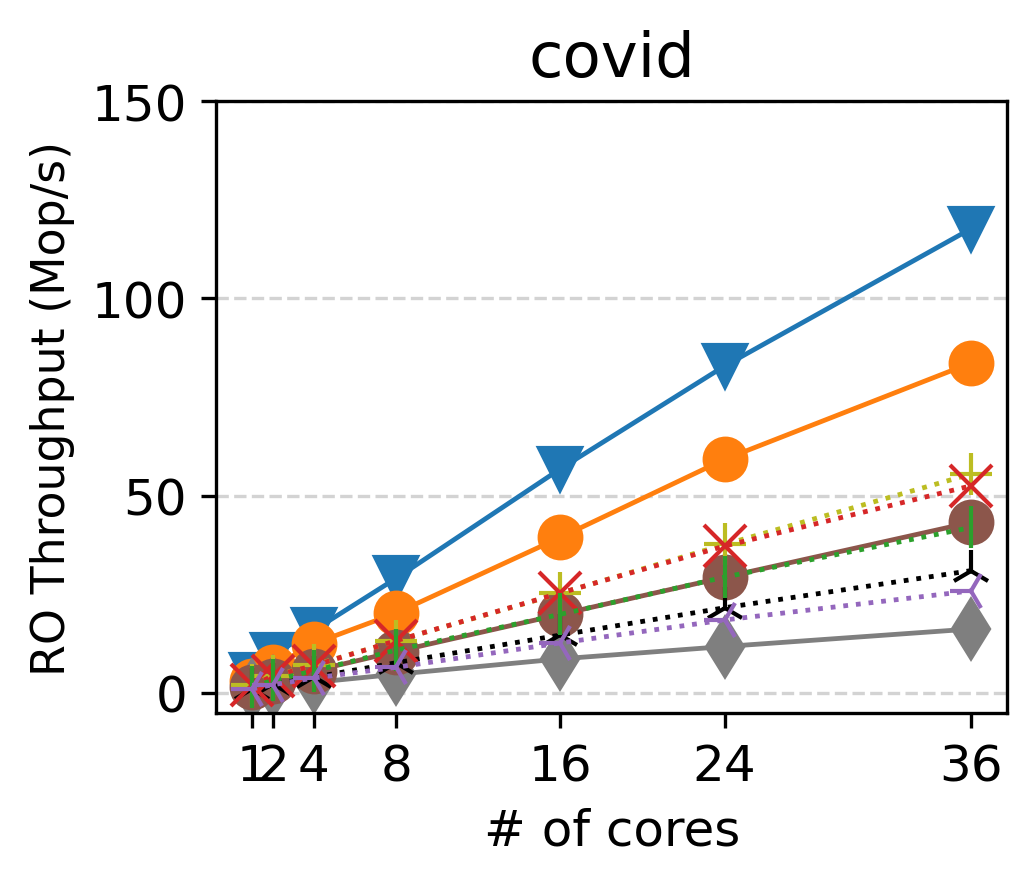

In [152]:
workload = list(set(df['workload']))[0]
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 50, 100, 150], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('covid', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=[systems.get(i).get('name') for i in systems], fontsize=fontsize-2, bbox_to_anchor=(1.05, 0.75)) 
plt.savefig('covid_ro.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [153]:
df = pd.read_csv('../covid_bal.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]

df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
0,BAL,covid,alexol,1,2.98
1,BAL,covid,alexol,1,3.06
2,BAL,covid,alexol,1,3.07
27,BAL,covid,alexol,2,6.09
28,BAL,covid,alexol,2,4.93
...,...,...,...,...,...
130,BAL,covid,xindex,24,13.07
131,BAL,covid,xindex,24,13.53
153,BAL,covid,xindex,36,17.47
154,BAL,covid,xindex,36,17.41


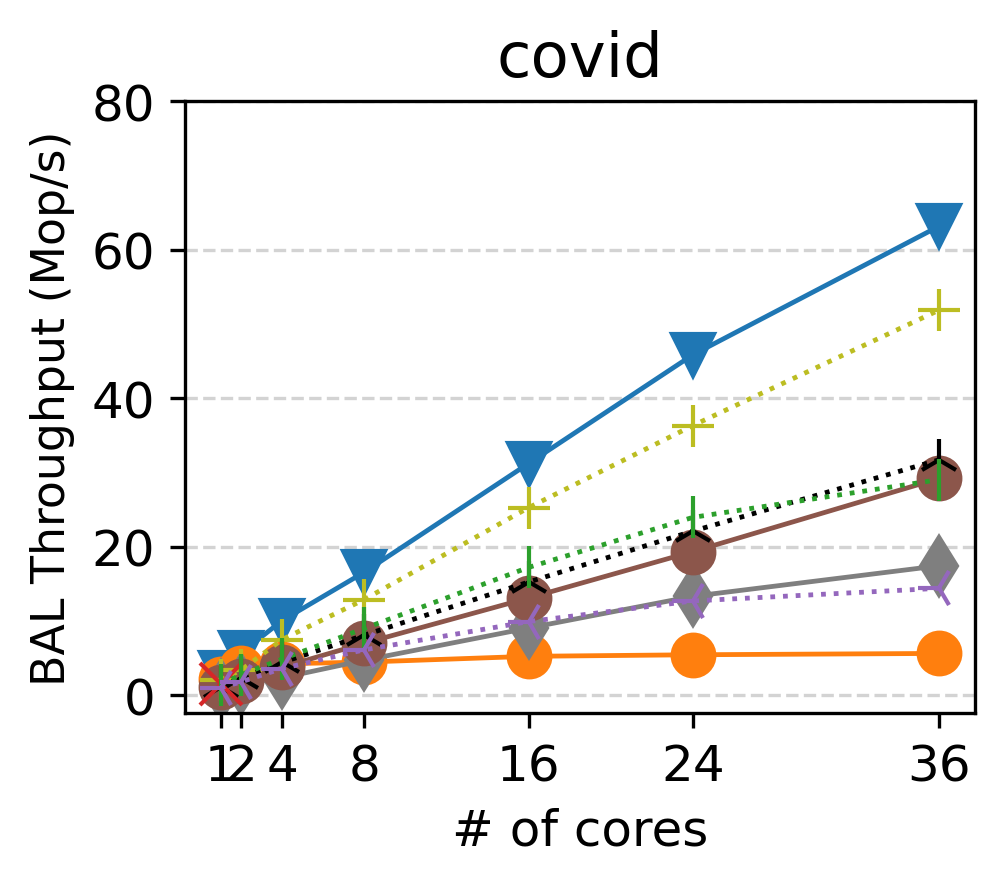

In [155]:
workload = list(set(df['workload']))[0]
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 20, 40, 60, 80], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('covid', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=[systems.get(i).get('name') for i in systems], fontsize=fontsize-2, bbox_to_anchor=(1.05, 0.75)) 
# plt.savefig('covid_bal.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [156]:
df = pd.read_csv('../covid_wo.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]

df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
144,WO,covid,alexol,1,2.27
145,WO,covid,alexol,1,2.26
146,WO,covid,alexol,1,2.32
120,WO,covid,alexol,2,3.75
121,WO,covid,alexol,2,4.57
...,...,...,...,...,...
31,WO,covid,xindex,24,11.42
32,WO,covid,xindex,24,11.42
6,WO,covid,xindex,36,15.00
7,WO,covid,xindex,36,14.59


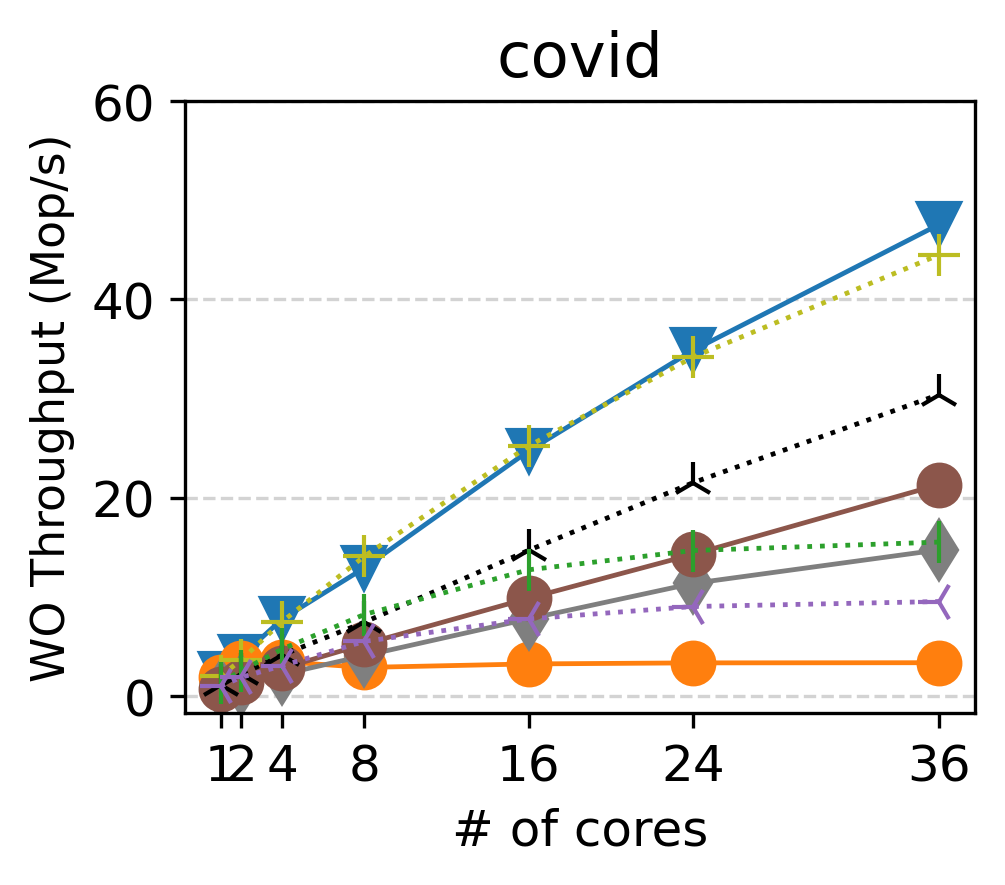

In [158]:
workload = list(set(df['workload']))[0]
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 20, 40, 60], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('covid', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=[systems.get(i).get('name') for i in systems], fontsize=fontsize-2, bbox_to_anchor=(1.05, 0.75)) 
# plt.savefig('covid_bal.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [219]:
df = pd.read_csv('../libio_wo.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]

df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
0,WO,libio,alexol,1,1.96
1,WO,libio,alexol,1,1.98
2,WO,libio,alexol,1,1.97
24,WO,libio,alexol,2,3.84
25,WO,libio,alexol,2,3.92
...,...,...,...,...,...
127,WO,libio,xindex,24,13.95
128,WO,libio,xindex,24,13.98
150,WO,libio,xindex,36,17.25
151,WO,libio,xindex,36,17.73


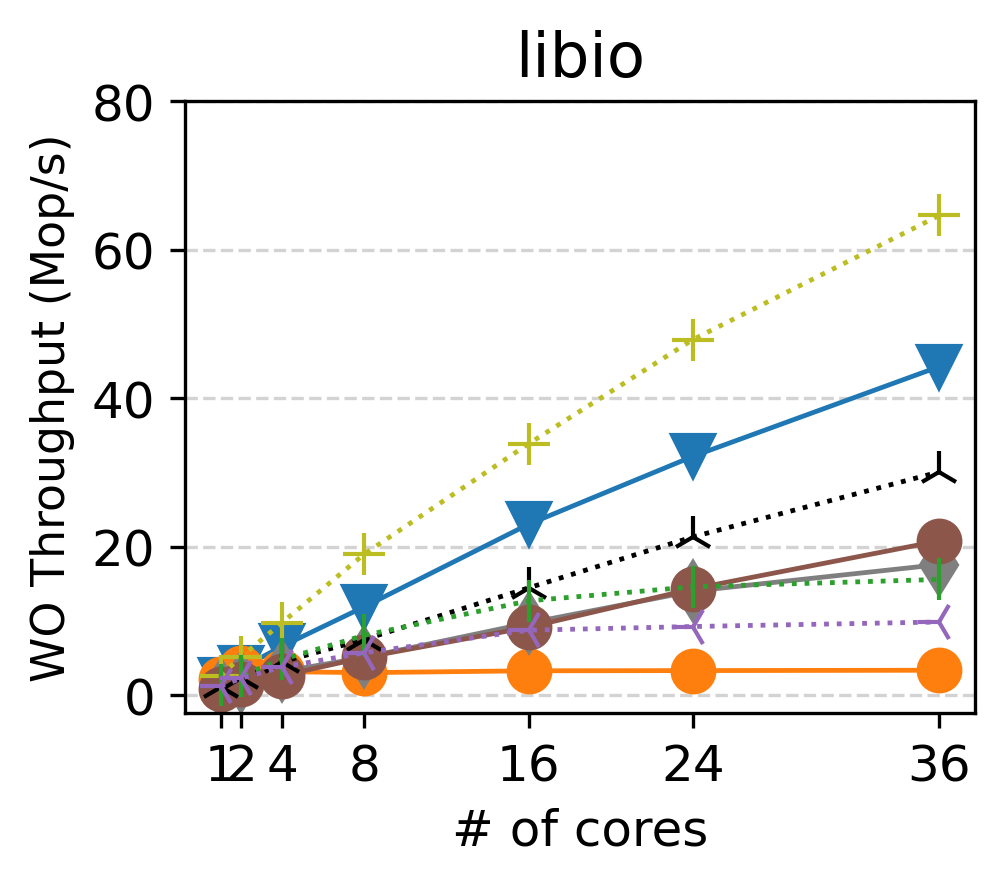

In [221]:
workload = list(set(df['workload']))[0]
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 20, 40, 60, 80], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('libio', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=[systems.get(i).get('name') for i in systems], fontsize=fontsize-2, bbox_to_anchor=(1.05, 0.75)) 
# plt.savefig('covid_bal.jpeg', dpi=300, bbox_inches='tight')
plt.show()

### Single workload multiple datasets

In [170]:
df1 = pd.read_csv('../covid_wo.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df2 = pd.read_csv('../libio_wo.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]

df = pd.concat([df1, df2], ignore_index=True)

df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
144,WO,covid,alexol,1,2.27
145,WO,covid,alexol,1,2.26
146,WO,covid,alexol,1,2.32
120,WO,covid,alexol,2,3.75
121,WO,covid,alexol,2,4.57
...,...,...,...,...,...
295,WO,libio,xindex,24,13.95
296,WO,libio,xindex,24,13.98
318,WO,libio,xindex,36,17.25
319,WO,libio,xindex,36,17.73


covid
libio


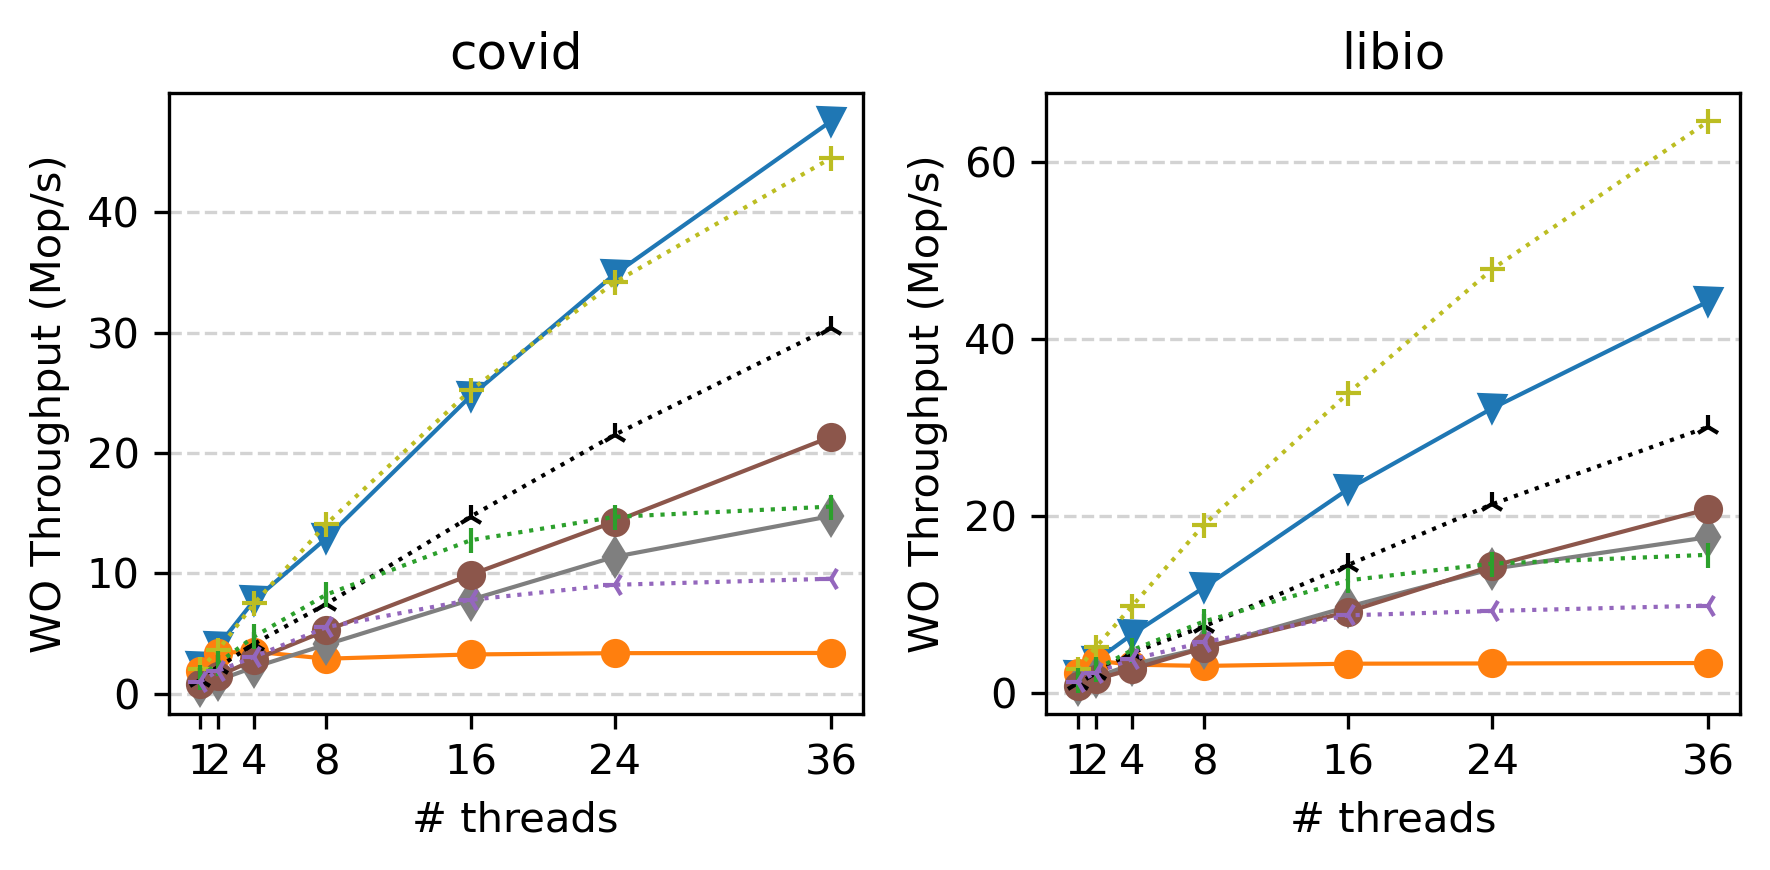

In [174]:
datasets = list(set(df['dataset']))
workload = list(set(df['workload']))[0]

fontsize = 9
fig, axes = plt.subplots(1, 2, figsize=(6, 3), dpi=300)

for j, dataset in enumerate(datasets):
    print(dataset)
    df_plot = df.loc[(df['dataset'] == dataset) & (df['workload'] == workload)]

    df_mean = df_plot.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

    for i, system in enumerate(systems):
        system_data = df_plot.loc[df_plot['index_type'] == system]
        system_mean = df_mean.loc[df_mean['index_type'] == system]
        axes[j].plot(system_mean['# threads'], system_mean['throughput'], \
                     marker=systems.get(system).get('marker'), \
                     markersize=6, \
                     linewidth=1, \
                     color=systems.get(system).get('color'), \
                     linestyle=systems.get(system).get('linestyle'))
    #     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

    axes[j].set_xticks([1, 2, 4, 8, 16, 24, 36])
#     axes[j].set_yticks([0, 100, 200, 300, 400, 500, 600])

    axes[j].set_xlabel('# threads', fontsize=fontsize+1)
    axes[j].set_ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
    axes[j].set_title(dataset, fontsize=fontsize + 3)
    axes[j].grid(axis='y', linestyle='--', color='lightgrey')

plt.tight_layout()
plt.show()

### Covid read-only with CLI 

In [196]:
df_cli = pd.read_csv('../../concurrent-learned-index/covid.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df_cli['dataset'] = df_cli['key_path'].apply(lambda x: x.split('/')[-1])
df_cli['workload'] = df_cli['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df_cli['throughput'] = df_cli['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df_cli = df_cli.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df_cli = df_cli.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df_cli

,workload,dataset,index_type,# threads,throughput
39,BAL,covid,alex,1,2.01
40,BAL,covid,alex,1,2.06
41,BAL,covid,alex,1,2.01
36,BAL,covid,alex,2,2.66
37,BAL,covid,alex,2,2.69
...,...,...,...,...,...
46,WO,covid,alex,24,2.22
47,WO,covid,alex,24,2.21
42,WO,covid,alex,36,2.29
43,WO,covid,alex,36,2.21


In [197]:
df = pd.read_csv('../covid_ro.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]

df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
0,RO,covid,alexol,1,4.57
1,RO,covid,alexol,1,4.49
2,RO,covid,alexol,1,4.82
27,RO,covid,alexol,2,9.27
28,RO,covid,alexol,2,9.80
...,...,...,...,...,...
142,RO,covid,xindex,24,11.70
143,RO,covid,xindex,24,11.85
168,RO,covid,xindex,36,17.22
169,RO,covid,xindex,36,15.35


In [198]:
df = pd.concat([df, df_cli], ignore_index=True)
df = df[df['workload']=='RO']
df

,workload,dataset,index_type,# threads,throughput
0,RO,covid,alexol,1,4.57
1,RO,covid,alexol,1,4.49
2,RO,covid,alexol,1,4.82
3,RO,covid,alexol,2,9.27
4,RO,covid,alexol,2,9.80
...,...,...,...,...,...
226,RO,covid,alex,24,2.64
227,RO,covid,alex,24,2.63
228,RO,covid,alex,36,2.82
229,RO,covid,alex,36,2.79


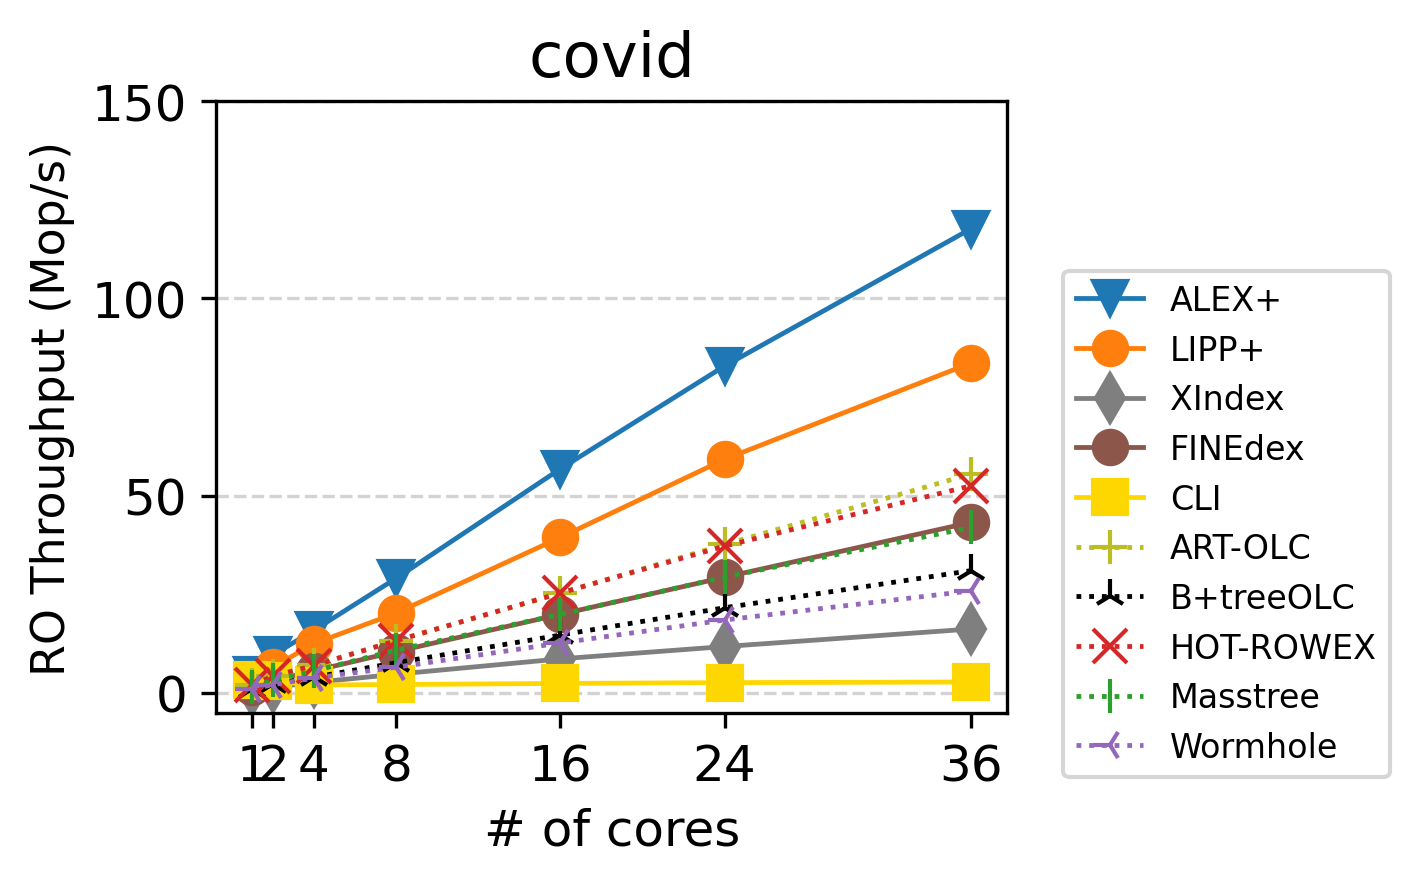

In [207]:
workload = list(set(df['workload']))[0]
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=8, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 50, 100, 150], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('covid', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.legend(labels=[systems.get(i).get('name') for i in systems], fontsize=fontsize-2, bbox_to_anchor=(1.05, 0.75)) 
plt.savefig('covid_ro.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [211]:
df = pd.read_csv('../covid_bal.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]

df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
0,BAL,covid,alexol,1,2.98
1,BAL,covid,alexol,1,3.06
2,BAL,covid,alexol,1,3.07
27,BAL,covid,alexol,2,6.09
28,BAL,covid,alexol,2,4.93
...,...,...,...,...,...
130,BAL,covid,xindex,24,13.07
131,BAL,covid,xindex,24,13.53
153,BAL,covid,xindex,36,17.47
154,BAL,covid,xindex,36,17.41


In [212]:
df_cli = pd.read_csv('../../concurrent-learned-index/covid.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df_cli['dataset'] = df_cli['key_path'].apply(lambda x: x.split('/')[-1])
df_cli['workload'] = df_cli['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df_cli['throughput'] = df_cli['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df_cli = df_cli.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df_cli = df_cli.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df_cli

,workload,dataset,index_type,# threads,throughput
39,BAL,covid,alex,1,2.01
40,BAL,covid,alex,1,2.06
41,BAL,covid,alex,1,2.01
36,BAL,covid,alex,2,2.66
37,BAL,covid,alex,2,2.69
...,...,...,...,...,...
46,WO,covid,alex,24,2.22
47,WO,covid,alex,24,2.21
42,WO,covid,alex,36,2.29
43,WO,covid,alex,36,2.21


In [213]:
df = pd.concat([df, df_cli], ignore_index=True)
df = df[df['workload']=='BAL']
df

,workload,dataset,index_type,# threads,throughput
0,BAL,covid,alexol,1,2.98
1,BAL,covid,alexol,1,3.06
2,BAL,covid,alexol,1,3.07
3,BAL,covid,alexol,2,6.09
4,BAL,covid,alexol,2,4.93
...,...,...,...,...,...
187,BAL,covid,alex,24,2.31
188,BAL,covid,alex,24,2.37
189,BAL,covid,alex,36,2.35
190,BAL,covid,alex,36,2.31


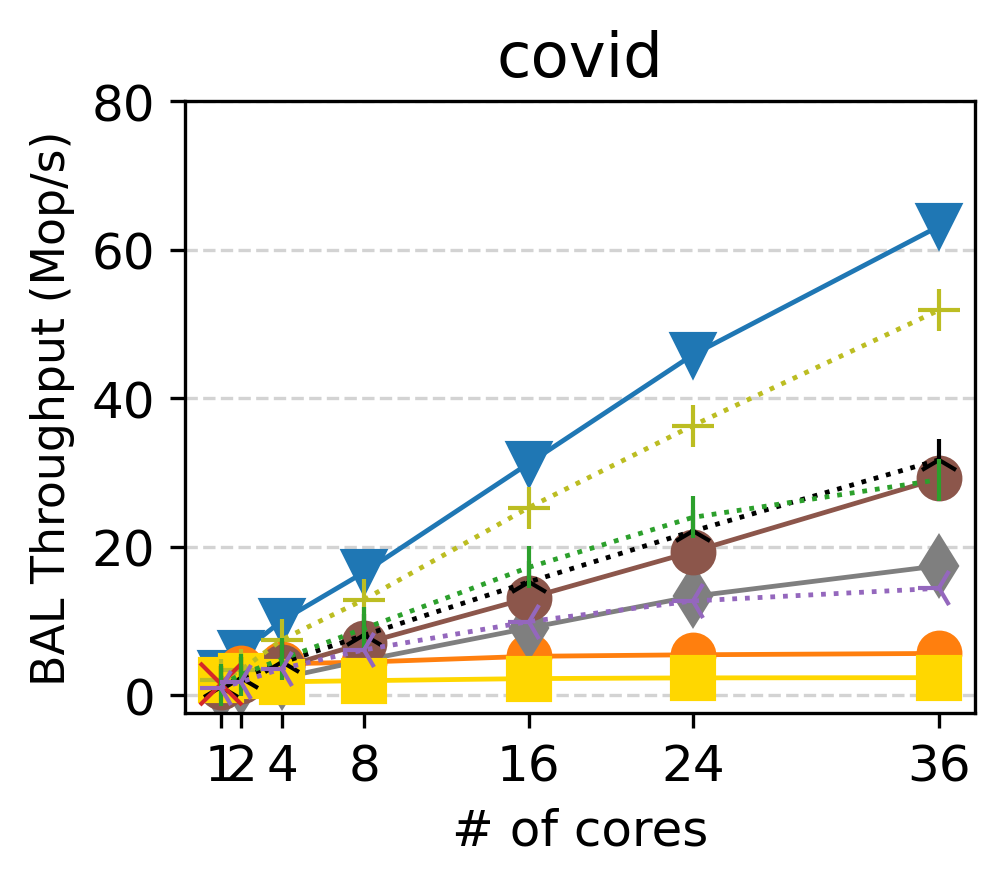

In [214]:
workload = list(set(df['workload']))[0]
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 20, 40, 60, 80], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('covid', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=[systems.get(i).get('name') for i in systems], fontsize=fontsize-2, bbox_to_anchor=(1.05, 0.75)) 
# plt.savefig('covid_bal.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [215]:
df = pd.read_csv('../covid_wo.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]

df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
144,WO,covid,alexol,1,2.27
145,WO,covid,alexol,1,2.26
146,WO,covid,alexol,1,2.32
120,WO,covid,alexol,2,3.75
121,WO,covid,alexol,2,4.57
...,...,...,...,...,...
31,WO,covid,xindex,24,11.42
32,WO,covid,xindex,24,11.42
6,WO,covid,xindex,36,15.00
7,WO,covid,xindex,36,14.59


In [216]:
df_cli = pd.read_csv('../../concurrent-learned-index/covid.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df_cli['dataset'] = df_cli['key_path'].apply(lambda x: x.split('/')[-1])
df_cli['workload'] = df_cli['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df_cli['throughput'] = df_cli['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df_cli = df_cli.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df_cli = df_cli.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df_cli

,workload,dataset,index_type,# threads,throughput
39,BAL,covid,alex,1,2.01
40,BAL,covid,alex,1,2.06
41,BAL,covid,alex,1,2.01
36,BAL,covid,alex,2,2.66
37,BAL,covid,alex,2,2.69
...,...,...,...,...,...
46,WO,covid,alex,24,2.22
47,WO,covid,alex,24,2.21
42,WO,covid,alex,36,2.29
43,WO,covid,alex,36,2.21


In [217]:
df = pd.concat([df, df_cli], ignore_index=True)
df = df[df['workload']=='WO']
df

,workload,dataset,index_type,# threads,throughput
0,WO,covid,alexol,1,2.27
1,WO,covid,alexol,1,2.26
2,WO,covid,alexol,1,2.32
3,WO,covid,alexol,2,3.75
4,WO,covid,alexol,2,4.57
...,...,...,...,...,...
226,WO,covid,alex,24,2.22
227,WO,covid,alex,24,2.21
228,WO,covid,alex,36,2.29
229,WO,covid,alex,36,2.21


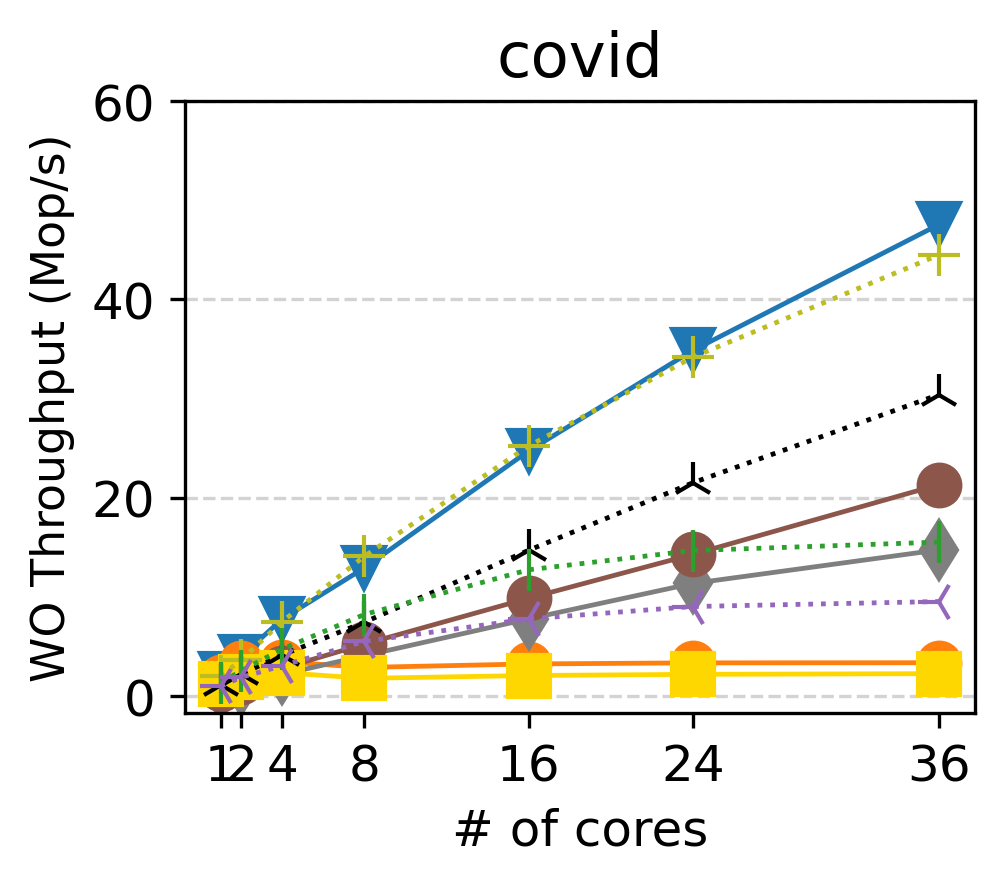

In [218]:
workload = list(set(df['workload']))[0]
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 20, 40, 60], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('covid', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=[systems.get(i).get('name') for i in systems], fontsize=fontsize-2, bbox_to_anchor=(1.05, 0.75)) 
# plt.savefig('covid_bal.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [229]:
df = pd.read_csv('../libio_wo.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]

df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
0,WO,libio,alexol,1,1.96
1,WO,libio,alexol,1,1.98
2,WO,libio,alexol,1,1.97
24,WO,libio,alexol,2,3.84
25,WO,libio,alexol,2,3.92
...,...,...,...,...,...
127,WO,libio,xindex,24,13.95
128,WO,libio,xindex,24,13.98
150,WO,libio,xindex,36,17.25
151,WO,libio,xindex,36,17.73


In [230]:
df_cli = pd.read_csv('../../concurrent-learned-index/libio.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df_cli['dataset'] = df_cli['key_path'].apply(lambda x: x.split('/')[-1])
df_cli['workload'] = df_cli['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df_cli['throughput'] = df_cli['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df_cli = df_cli.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df_cli = df_cli.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df_cli

,workload,dataset,index_type,# threads,throughput
39,BAL,libio,alex,1,1.71
40,BAL,libio,alex,1,1.69
41,BAL,libio,alex,1,1.72
36,BAL,libio,alex,2,2.49
37,BAL,libio,alex,2,2.51
...,...,...,...,...,...
46,WO,libio,alex,24,2.15
47,WO,libio,alex,24,2.13
42,WO,libio,alex,36,2.21
43,WO,libio,alex,36,2.26


In [231]:
df = pd.concat([df, df_cli], ignore_index=True)
df = df[df['workload']=='WO']
df

,workload,dataset,index_type,# threads,throughput
0,WO,libio,alexol,1,1.96
1,WO,libio,alexol,1,1.98
2,WO,libio,alexol,1,1.97
3,WO,libio,alexol,2,3.84
4,WO,libio,alexol,2,3.92
...,...,...,...,...,...
226,WO,libio,alex,24,2.15
227,WO,libio,alex,24,2.13
228,WO,libio,alex,36,2.21
229,WO,libio,alex,36,2.26


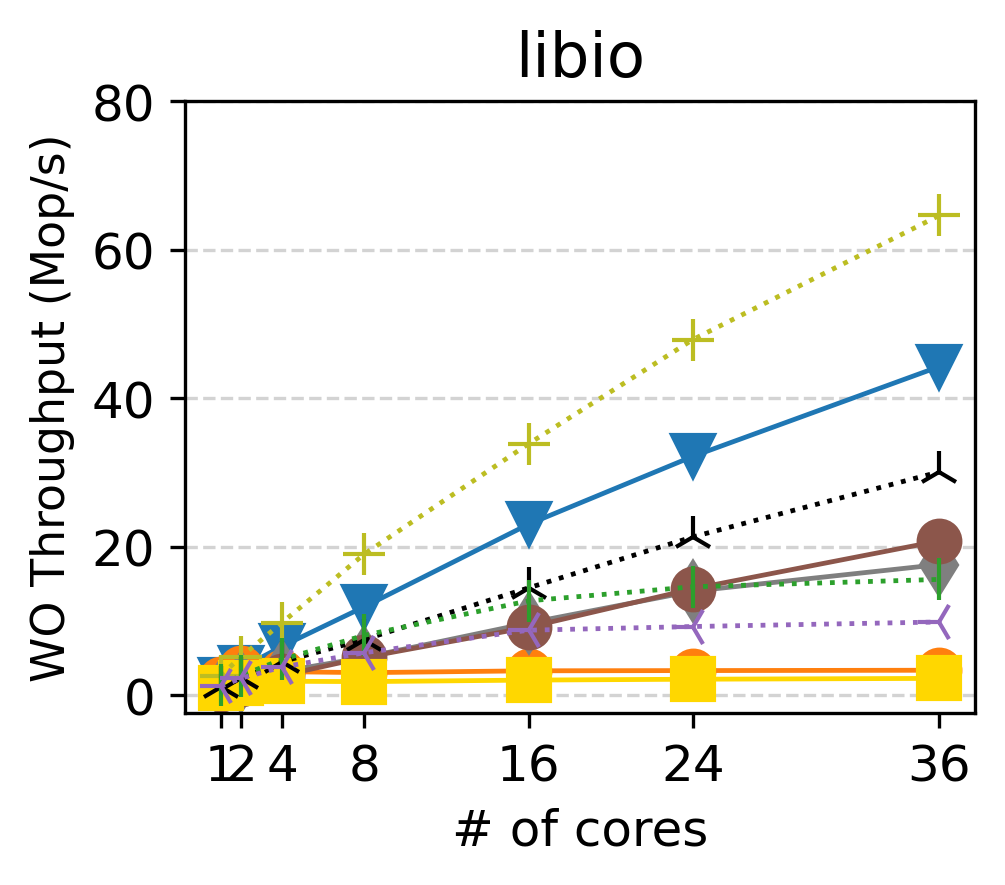

In [232]:
workload = list(set(df['workload']))[0]
df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(systems):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 20, 40, 60, 80], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('libio', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=[systems.get(i).get('name') for i in systems], fontsize=fontsize-2, bbox_to_anchor=(1.05, 0.75)) 
# plt.savefig('covid_bal.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [225]:
list(pd.read_csv('../libio_wo.csv').keys())

['id',
 'read_ratio',
 'insert_ratio',
 'update_ratio',
 'scan_ratio',
 'delete_ratio',
 'key_path',
 'index_type',
 'throughput',
 'init_table_size',
 'memory_consumption',
 'thread_num',
 'min',
 '50 percentile',
 '90 percentile',
 '99 percentile',
 '99.9 percentile',
 '99.99 percentile',
 'max',
 'avg',
 'seed',
 'scan_num',
 'latency_variance',
 'latency_sample',
 'data_shift',
 'pgm',
 'error_bound',
 'table_size']

In [17]:
df = pd.read_csv('../covid_ro.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]


df[df['index_type']=='alexol']

,read_ratio,key_path,throughput,thread_num,index_type
0,1,./datasets/covid,4570137,1,alexol
1,1,./datasets/covid,4488185,1,alexol
2,1,./datasets/covid,4816292,1,alexol
27,1,./datasets/covid,9272612,2,alexol
28,1,./datasets/covid,9800926,2,alexol
29,1,./datasets/covid,9745907,2,alexol
54,1,./datasets/covid,15373822,4,alexol
55,1,./datasets/covid,16354230,4,alexol
56,1,./datasets/covid,16009095,4,alexol
81,1,./datasets/covid,28898446,8,alexol


In [25]:
df1 = pd.read_csv('../ro.csv')
df2 = pd.read_csv('../covid_ro.csv')

df_ro = pd.concat([df1, df2], ignore_index=True)
df_ro

,id,read_ratio,insert_ratio,update_ratio,scan_ratio,delete_ratio,key_path,index_type,throughput,init_table_size,...,max,avg,seed,scan_num,latency_variance,latency_sample,data_shift,pgm,error_bound,table_size
0,20231102170222,1,0,0,0,0,./datasets/libio,alexol,112173792,200000000,...,0,0,1866,100,0,0,0,0,64,200000000
1,20231102170415,1,0,0,0,0,./datasets/libio,alexol,110467863,200000000,...,0,0,1866,100,0,0,0,0,64,200000000
2,20231102170615,1,0,0,0,0,./datasets/libio,alexol,112269702,200000000,...,0,0,1866,100,0,0,0,0,64,200000000
3,20231102170725,1,0,0,0,0,./datasets/libio,lippol,134773393,200000000,...,0,0,1866,100,0,0,0,0,64,200000000
4,20231102170838,1,0,0,0,0,./datasets/libio,lippol,124003548,200000000,...,0,0,1866,100,0,0,0,0,64,200000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,20231031153205,1,0,0,0,0,./datasets/covid,masstree,42075196,200000000,...,0,0,1866,100,0,0,0,0,64,200000000
752,20231031153330,1,0,0,0,0,./datasets/covid,masstree,42020832,200000000,...,0,0,1866,100,0,0,0,0,64,200000000
753,20231031153506,1,0,0,0,0,./datasets/covid,wormhole_u64,25390604,200000000,...,0,0,1866,100,0,0,0,0,64,200000000
754,20231031153642,1,0,0,0,0,./datasets/covid,wormhole_u64,26178915,200000000,...,0,0,1866,100,0,0,0,0,64,200000000


In [28]:
# merge readings per workload

custom_order = {'covid': 0, 'libio': 1, 'genome': 2, 'osm': 3}
df_ro = df_ro.assign(dataset=df_ro['key_path'].map(custom_order)).sort_values(['key_path', 'thread_num', 'index_type'], ascending=[True, False, True])
df_ro = df_ro.drop(['dataset'], axis=1).reset_index(drop=True)
df_ro.to_csv('../out_ro.csv', index=False)

In [29]:
df = pd.read_csv('../out_ro.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]

df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
162,RO,covid,alexol,1,4.57
163,RO,covid,alexol,1,4.49
164,RO,covid,alexol,1,4.82
135,RO,covid,alexol,2,9.27
136,RO,covid,alexol,2,9.80
...,...,...,...,...,...
619,RO,osm,xindex,24,16.83
620,RO,osm,xindex,24,16.26
591,RO,osm,xindex,36,22.44
592,RO,osm,xindex,36,22.35


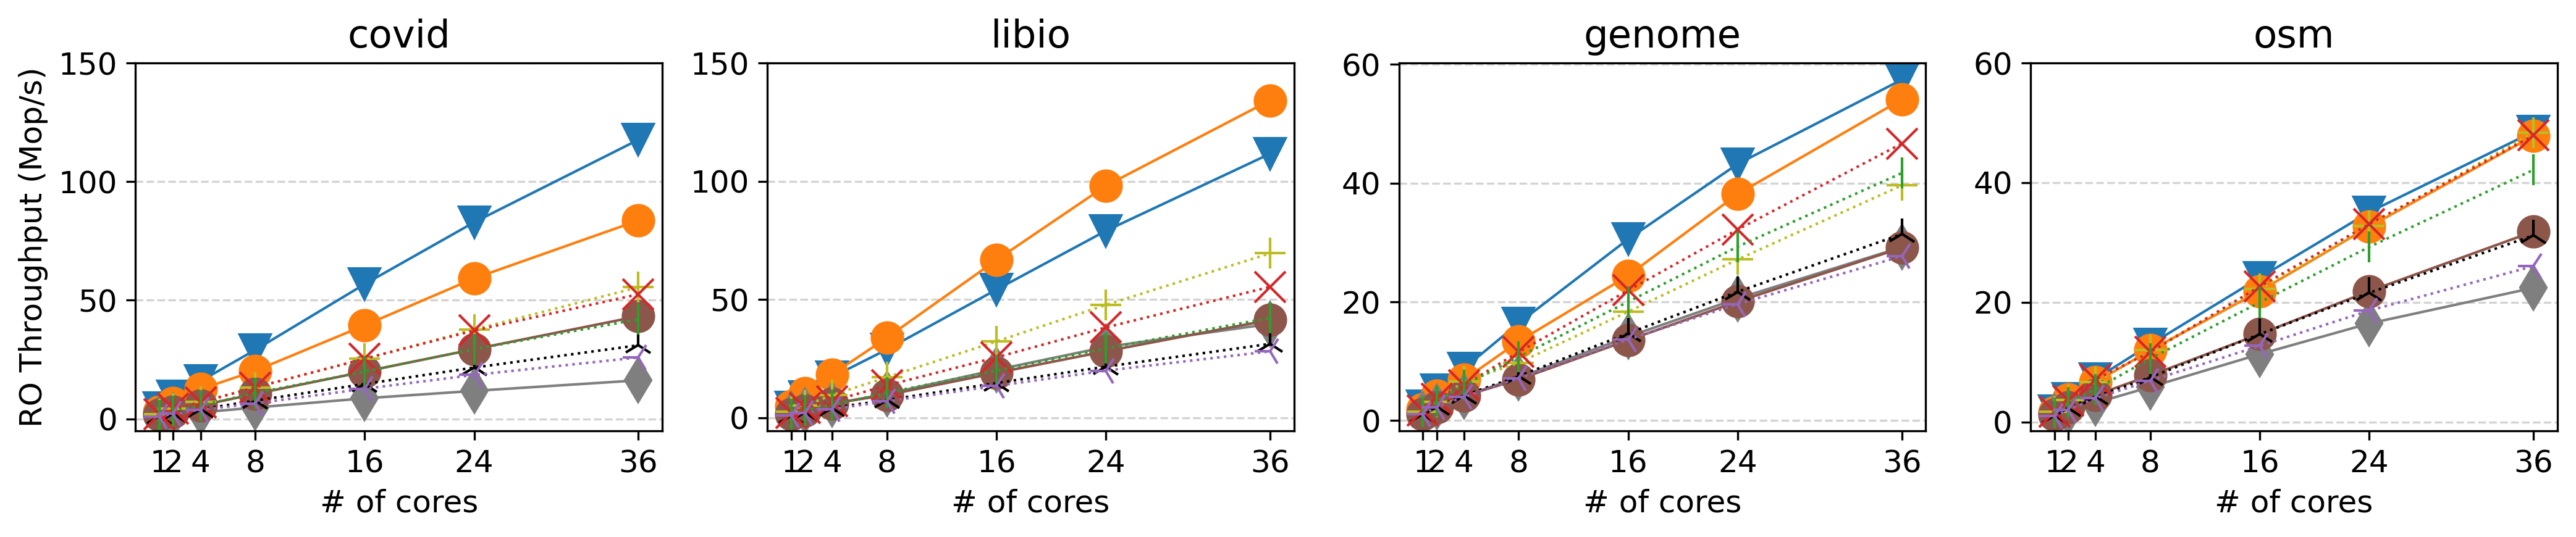

In [77]:
datasets = ['covid', 'libio', 'genome', 'osm']
workload = list(set(df['workload']))[0]

fontsize = 9
fig, axes = plt.subplots(1, 4, figsize=(14, 3), dpi=300)

for j, dataset in enumerate(datasets):
    df_plot = df.loc[(df['dataset'] == dataset) & (df['workload'] == workload)]

    df_mean = df_plot.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

    for i, system in enumerate(systems):
        system_data = df_plot.loc[df_plot['index_type'] == system]
        system_mean = df_mean.loc[df_mean['index_type'] == system]
        axes[j].plot(system_mean['# threads'], system_mean['throughput'], \
                     marker=systems.get(system).get('marker'), \
                     markersize=12, \
                     linewidth=1, \
                     color=systems.get(system).get('color'), \
                     linestyle=systems.get(system).get('linestyle'))
    #     sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=colors[i], alpha=0.2)

    axes[j].set_xticks([1, 2, 4, 8, 16, 24, 36])
    if j == 0: 
        axes[j].set_yticks([0, 50, 100, 150])
    if j == 1: 
        axes[j].set_yticks([0, 50, 100, 150])
    if j == 2: 
        axes[j].set_yticks([0, 20, 40, 60])
    if j == 3: 
        axes[j].set_yticks([0, 20, 40, 60])
    
    axes[j].set_yticklabels(axes[j].get_yticks(), fontsize=fontsize+3)
    axes[j].set_xticklabels(axes[j].get_xticks(), fontsize=fontsize+3)
    axes[j].set_xlabel('# of cores', fontsize=fontsize+3)
    if j == 0:
        axes[j].set_ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+3)
    axes[j].set_title(dataset, fontsize=fontsize + 6)
    axes[j].grid(axis='y', linestyle='--', color='lightgrey')

plt.tight_layout()
# plt.legend(labels=[systems.get(i).get('name') for i in systems], fontsize=fontsize, bbox_to_anchor=(1.05, 0.75)) 
plt.show()

In [68]:
for i in systems:
    print(i)

alexol
lippol
xindex
finedex
alex
artolc
btreeolc
hot
masstree
wormhole_u64


### Bar graphs for single-threaded indexes

In [83]:
df = pd.read_csv('../experiment_results/alex.csv')[['read_ratio', 'key_path', 'throughput', 'index_type']]
df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.3f}')))
df = df[['workload', 'dataset', 'index_type', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type']).reset_index(drop=True)
df['index_type'] = 'alexv'
df

,workload,dataset,index_type,throughput
0,BAL,covid,alexv,3.786
1,BAL,covid,alexv,3.819
2,BAL,covid,alexv,3.825
3,BAL,genome,alexv,1.944
4,BAL,genome,alexv,1.881
5,BAL,genome,alexv,1.922
6,BAL,libio,alexv,3.131
7,BAL,libio,alexv,3.054
8,BAL,libio,alexv,3.117
9,BAL,osm,alexv,1.639


In [84]:
df_alex = df.loc[df['dataset'] == 'covid'].reset_index(drop=True)
df_alex

,workload,dataset,index_type,throughput
0,BAL,covid,alexv,3.786
1,BAL,covid,alexv,3.819
2,BAL,covid,alexv,3.825
3,RO,covid,alexv,7.438
4,RO,covid,alexv,7.505
5,RO,covid,alexv,7.563
6,WO,covid,alexv,2.575
7,WO,covid,alexv,2.594
8,WO,covid,alexv,2.531


In [85]:
# get other systems for thread = 1 and dataset covid
df_ro = pd.read_csv('../experiment_results/out_ro.csv')
df_bal = pd.read_csv('../covid_bal.csv')
df_wo = pd.read_csv('../covid_wo.csv')
df_cli = pd.read_csv('../../concurrent-learned-index/experiment_results/cli.csv')

df = pd.concat([df_ro, df_bal, df_wo, df_cli], ignore_index=True)[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])

df = df.loc[(df['dataset']== 'covid') & (df['# threads'] == 1)]
df

,workload,dataset,index_type,# threads,throughput
1098,BAL,covid,alex,1,1.92
1099,BAL,covid,alex,1,1.91
1100,BAL,covid,alex,1,1.94
756,BAL,covid,alexol,1,2.98
757,BAL,covid,alexol,1,3.06
...,...,...,...,...,...
1093,WO,covid,wormhole_u64,1,1.01
1094,WO,covid,wormhole_u64,1,1.00
1077,WO,covid,xindex,1,0.65
1078,WO,covid,xindex,1,0.64


In [86]:
df = pd.concat([df, df_alex], ignore_index=True)
df = df.drop(['# threads'], axis=1).reset_index(drop=True)
df

,workload,dataset,index_type,throughput
0,BAL,covid,alex,1.920
1,BAL,covid,alex,1.910
2,BAL,covid,alex,1.940
3,BAL,covid,alexol,2.980
4,BAL,covid,alexol,3.060
...,...,...,...,...
91,RO,covid,alexv,7.505
92,RO,covid,alexv,7.563
93,WO,covid,alexv,2.575
94,WO,covid,alexv,2.594


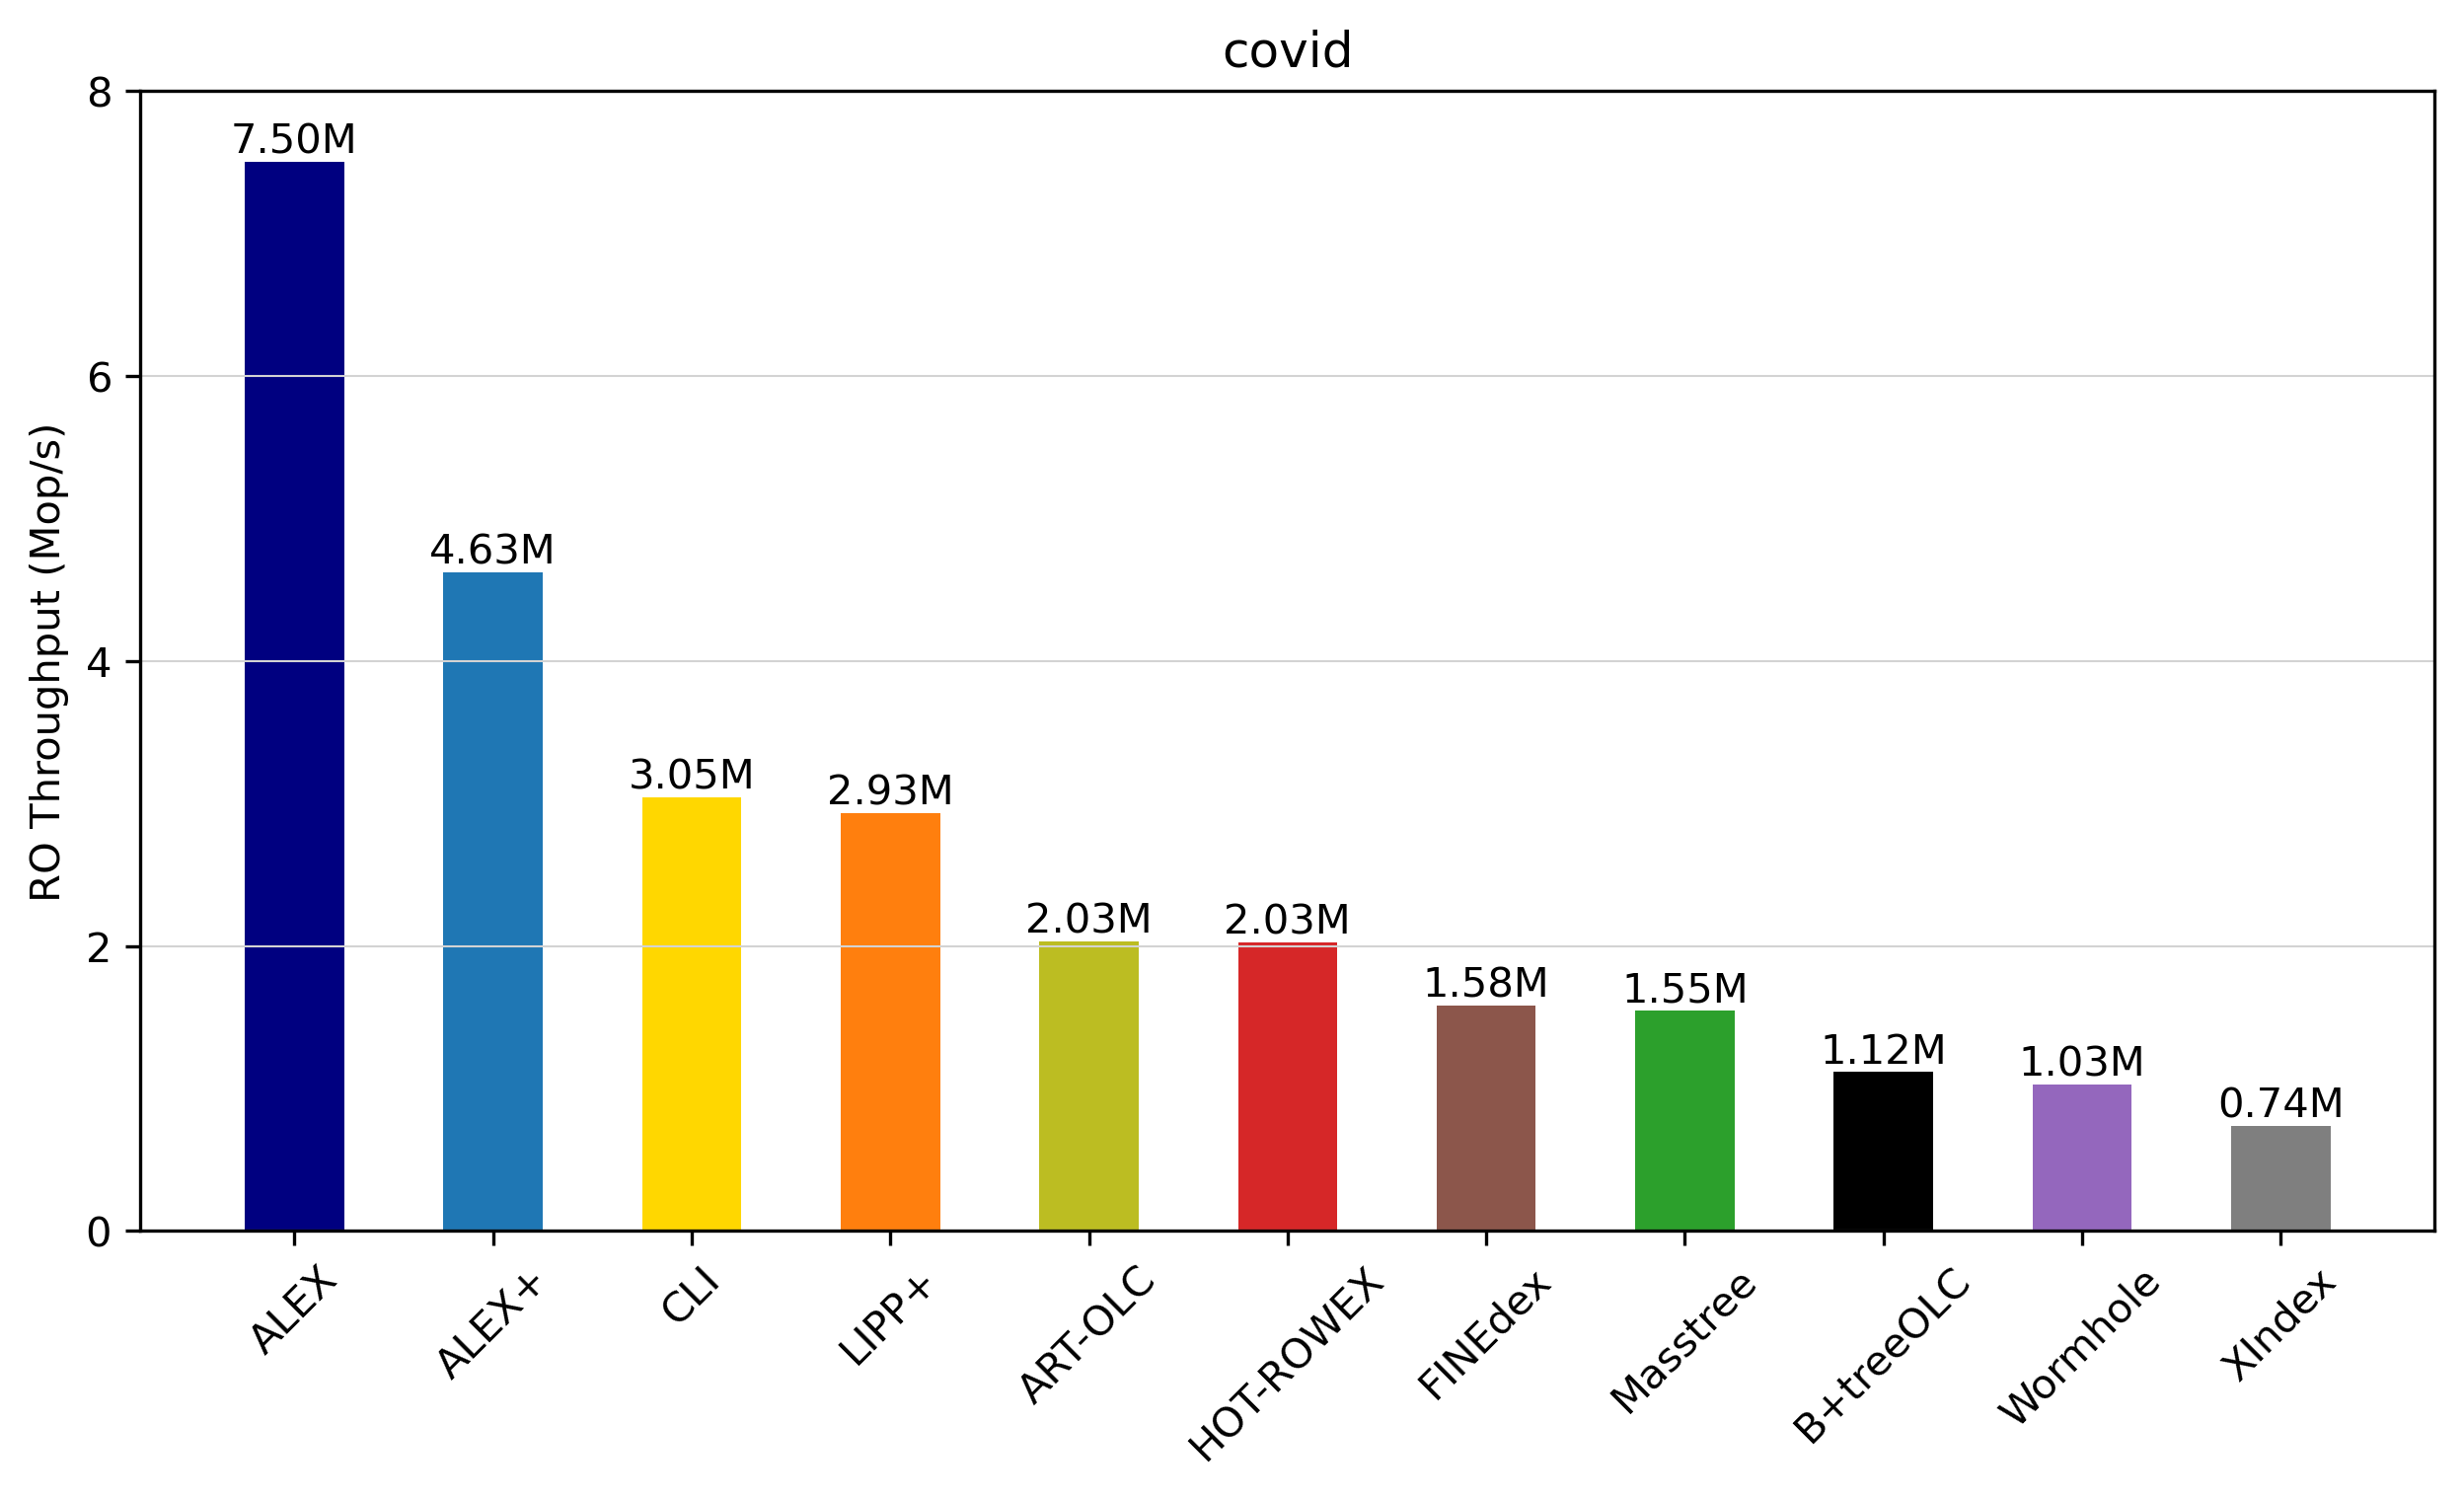

In [87]:
fig = plt.figure(figsize = (10, 5), dpi=300)

df_bar = df[df['workload'] == 'RO']
df_avg = df_bar.groupby('index_type')['throughput'].mean().reset_index().sort_values(by='throughput', ascending=False)
df_avg['index_name'] = df_avg['index_type'].apply(lambda x: systems.get(x).get('name'))

indexes = df_avg['index_name']
throughput = df_avg['throughput']
 
colors = [systems.get(index).get('color') for index in df_avg['index_type']]
bars = plt.bar(indexes, throughput, color=colors, width = 0.5)

# Adding text labels on top of the bars
for bar, value in zip(bars, throughput):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}M', ha='center', va='bottom')

 
plt.ylabel('RO Throughput (Mop/s)')
plt.yticks([0, 2, 4, 6, 8])
plt.xticks(rotation=45)
plt.title('covid')
plt.grid(axis='y', color='lightgray', linewidth=0.5)
plt.show()

In [88]:
set(indexes)

{'ALEX',
 'ALEX+',
 'ART-OLC',
 'B+treeOLC',
 'CLI',
 'FINEdex',
 'HOT-ROWEX',
 'LIPP+',
 'Masstree',
 'Wormhole',
 'XIndex'}

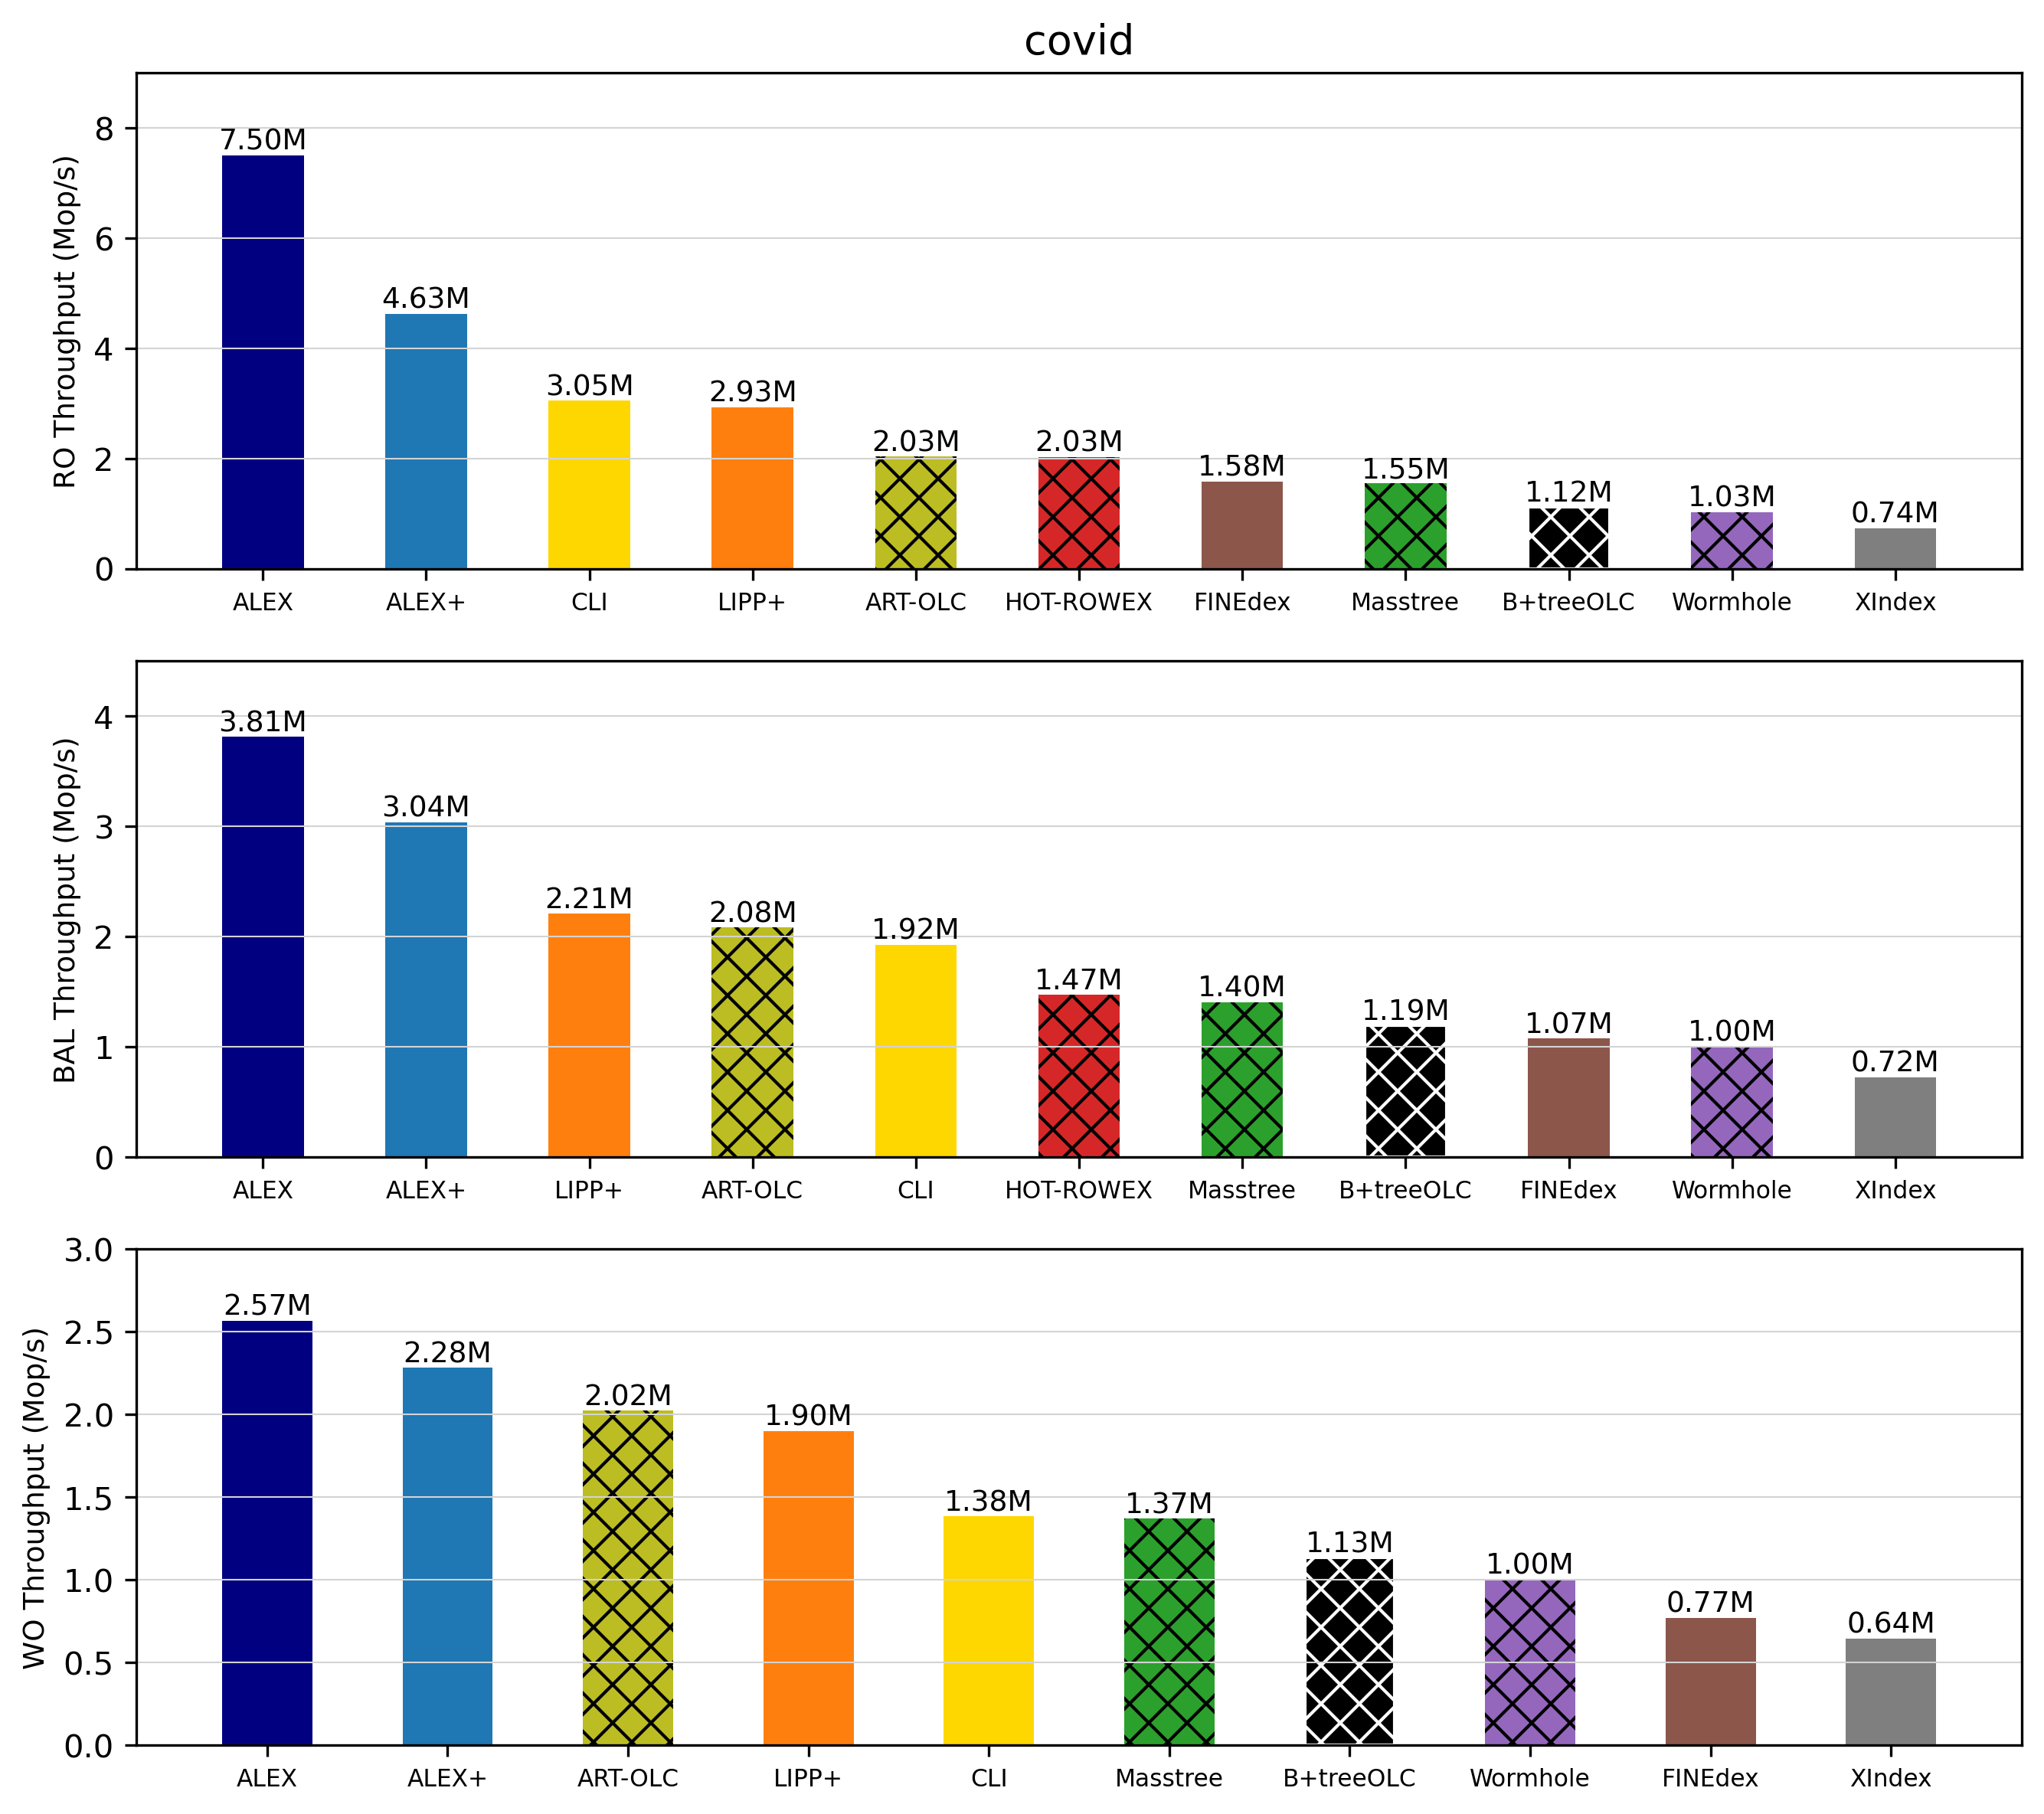

In [175]:
workloads = ['RO', 'BAL', 'WO']
fontsize=10
systems_to_texture = ['ART-OLC', 'B+treeOLC', 'HOT-ROWEX', 'Masstree', 'Wormhole']
fig, axs = plt.subplots(3, 1, figsize=(9, 8), dpi=300)

for i, workload in enumerate(workloads):
    df_bar = df[df['workload'] == workload]
    df_avg = df_bar.groupby('index_type')['throughput'].mean().reset_index().sort_values(by='throughput', ascending=False)
    df_avg['index_name'] = df_avg['index_type'].apply(lambda x: systems.get(x).get('name'))

    indexes = df_avg['index_name']
    throughput = df_avg['throughput']

    colors = [systems.get(index).get('color') for index in df_avg['index_type']]
    bars = axs[i].bar(indexes, throughput, color=colors, width=0.5)

    for bar, value in zip(bars, throughput):
        axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}M', ha='center', va='bottom', fontsize=fontsize-1)

    for bar, index_name, value, color in zip(bars, indexes, throughput, colors):
        if index_name in systems_to_texture:
            if color == 'black':
                bar.set_edgecolor('white')  # Set white hatch pattern for black bars
            bar.set_hatch('xx')  # Set default hatch pattern for non-black bars  
                
    axs[i].set_ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize-1)
    if workload == 'RO':
        axs[i].set_yticks([0, 2, 4, 6, 8])
        axs[i].set_ylim(top=9)
        axs[i].set_title('covid', fontsize=fontsize+3)
    if workload == 'BAL':
        axs[i].set_ylim(top=4.5)
    if workload == 'WO':
        axs[i].set_ylim(top=3)
    axs[i].set_xticklabels(indexes, rotation=0, fontsize=fontsize-2.5)

    axs[i].grid(axis='y', color='lightgray', linewidth=0.5)

plt.tight_layout()
plt.show()

In [32]:
df = pd.read_csv('../experiment_results/alexol_synthetic_2b.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
25,BAL,synthetic_2000000000,alexol,1,1.76
26,BAL,synthetic_2000000000,alexol,1,1.74
27,BAL,synthetic_2000000000,alexol,1,1.78
22,BAL,synthetic_2000000000,alexol,2,3.82
23,BAL,synthetic_2000000000,alexol,2,3.82
...,...,...,...,...,...
44,WO,synthetic_2000000000,alexol,24,27.92
45,WO,synthetic_2000000000,alexol,24,27.44
46,WO,synthetic_2000000000,alexol,36,40.20
47,WO,synthetic_2000000000,alexol,36,40.12


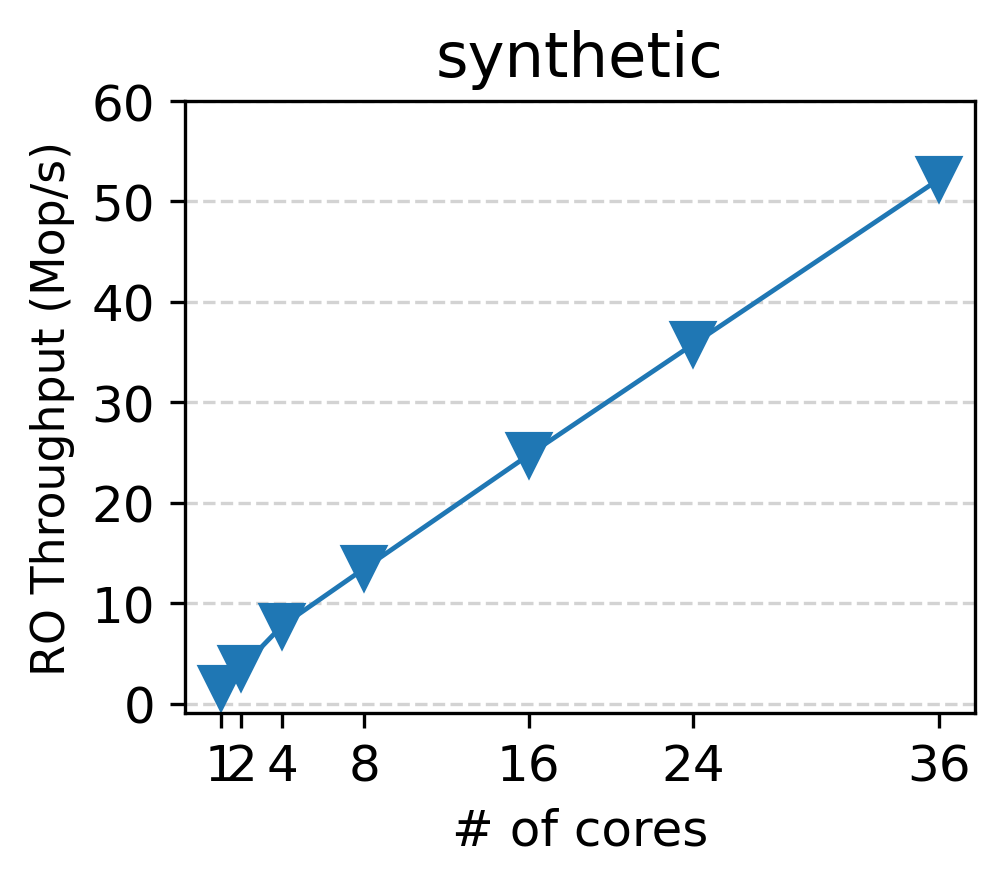

In [33]:
workload = 'RO'
indexes = ['alexol']

df = df[df['workload'] == workload]

df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(indexes):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 10, 20, 30, 40, 50, 60], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('synthetic', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=['ALEX'], loc='upper center', ncol=1, bbox_to_anchor=(0.5, 1.075))
# plt.savefig('covid_bal.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
df = pd.read_csv('../experiment_results/alexol_synthetic_2b.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
25,BAL,synthetic_2000000000,alexol,1,1.76
26,BAL,synthetic_2000000000,alexol,1,1.74
27,BAL,synthetic_2000000000,alexol,1,1.78
22,BAL,synthetic_2000000000,alexol,2,3.82
23,BAL,synthetic_2000000000,alexol,2,3.82
...,...,...,...,...,...
44,WO,synthetic_2000000000,alexol,24,27.92
45,WO,synthetic_2000000000,alexol,24,27.44
46,WO,synthetic_2000000000,alexol,36,40.20
47,WO,synthetic_2000000000,alexol,36,40.12


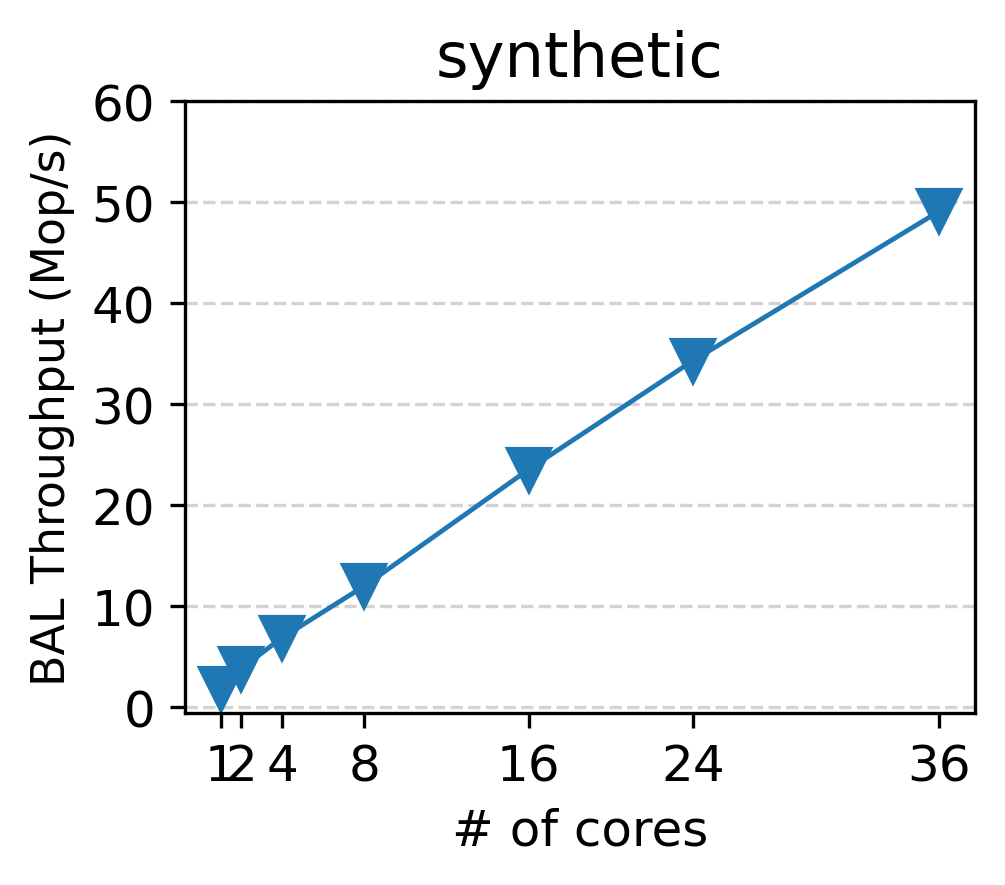

In [35]:
workload = 'BAL'
indexes = ['alexol']

df = df[df['workload'] == workload]

df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(indexes):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 10, 20, 30, 40, 50, 60], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('synthetic', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=['ALEX'], loc='upper center', ncol=1, bbox_to_anchor=(0.5, 1.075))
# plt.savefig('covid_bal.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
df = pd.read_csv('../experiment_results/alexol_synthetic_2b.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df

,workload,dataset,index_type,# threads,throughput
25,BAL,synthetic_2000000000,alexol,1,1.76
26,BAL,synthetic_2000000000,alexol,1,1.74
27,BAL,synthetic_2000000000,alexol,1,1.78
22,BAL,synthetic_2000000000,alexol,2,3.82
23,BAL,synthetic_2000000000,alexol,2,3.82
...,...,...,...,...,...
44,WO,synthetic_2000000000,alexol,24,27.92
45,WO,synthetic_2000000000,alexol,24,27.44
46,WO,synthetic_2000000000,alexol,36,40.20
47,WO,synthetic_2000000000,alexol,36,40.12


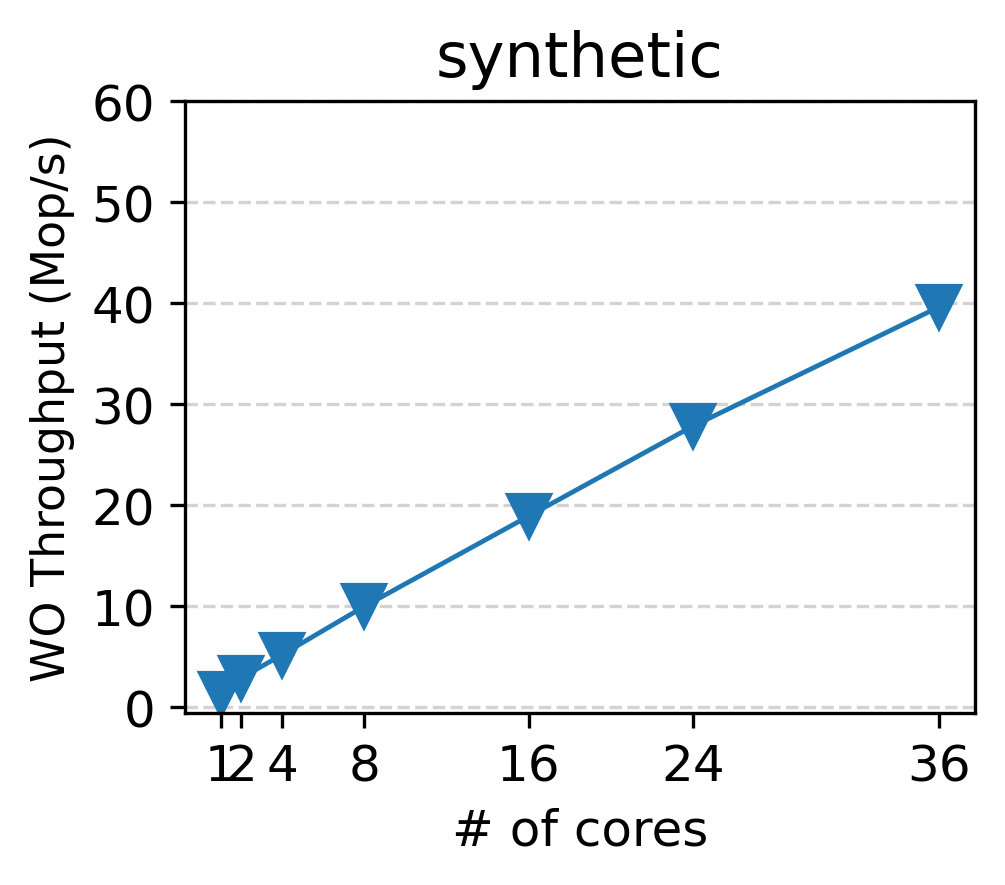

In [45]:
workload = 'WO'
indexes = ['alexol']

df = df[df['workload'] == workload]

df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(indexes):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
plt.yticks([0, 10, 20, 30, 40, 50, 60], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('synthetic', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=['ALEX+'], ncol=1, bbox_to_anchor=(-1.0, 1.075))
# plt.savefig('covid_bal.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
df = pd.read_csv('../../concurrent-learned-index/libio_ro.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
# df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index().drop(['index_type'], axis=1)

,# threads,throughput
0,1,2.701838e+06
1,2,2.914368e+06
2,4,2.415327e+06
3,8,2.144313e+06
4,16,2.419714e+06
5,24,2.665703e+06
6,36,2.728730e+06


In [17]:
df = pd.read_csv('../../concurrent-learned-index/libio_bal.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
# df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index().drop(['index_type'], axis=1)

,# threads,throughput
0,1,1.579101e+06
1,2,2.262066e+06
2,4,1.784231e+06
3,8,1.982771e+06
4,16,2.210166e+06
5,24,2.371757e+06
6,36,2.448770e+06


In [10]:
df = pd.read_csv('../../concurrent-learned-index/libio_wo.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type']]
df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
# df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads'])
df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index().drop(['index_type'], axis=1)

,# threads,throughput
0,1,1.133220e+06
1,2,1.893172e+06
2,4,2.080019e+06
3,8,1.863282e+06
4,16,2.136344e+06
5,24,2.254557e+06
6,36,2.347449e+06


In [24]:
df = pd.read_csv('../out.csv')[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type', 'memory_consumption']]
df['dataset'] = df['key_path'].apply(lambda x: x.split('/')[-1])
df['workload'] = df['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df['throughput'] = df['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df = df.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput']]
df = df.sort_values(by=['workload', 'dataset', 'index_type', '# threads', 'memory_consumption'])
df[df['workload'] == 'BAL']

KeyError: 'memory_consumption'

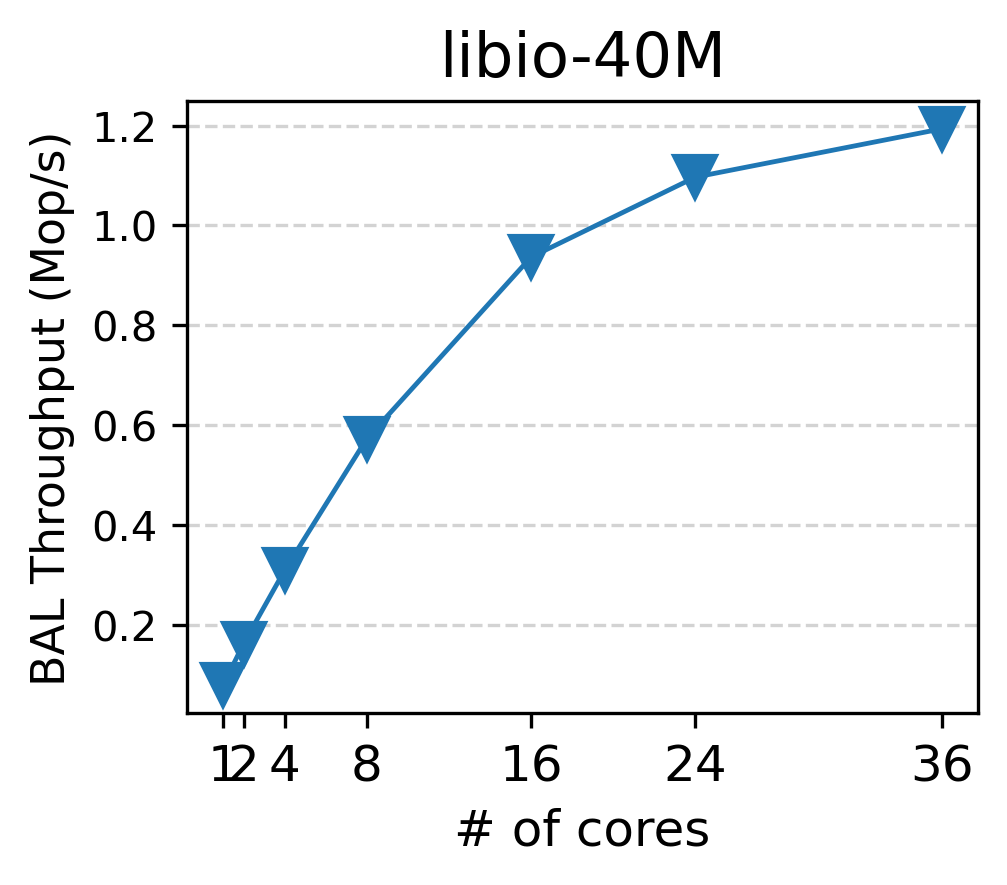

In [15]:
workload = 'BAL'
indexes = ['alexol']

df = df[df['workload'] == workload]

df_mean = df.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(indexes):
    system_data = df.loc[df['index_type'] == system]
    system_mean = df_mean.loc[df_mean['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    # sns.lineplot(data=system_data, x="# threads", y="throughput", err_style="band", ci="sd", color=systems.get(system).get('color'), alpha=0.2)

plt.xticks([1, 2, 4, 8, 16, 24, 36], fontsize=fontsize+2)
# plt.yticks([0, 10, 20, 30, 40, 50, 60], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('libio-40M', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
# plt.legend(labels=['ALEX+'], ncol=1, bbox_to_anchor=(-1.0, 1.075))
# plt.savefig('covid_bal.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
df1 = pd.read_csv('../out.csv').head(15)[['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type', 'memory_consumption']]
df1['dataset'] = df1['key_path'].apply(lambda x: x.split('/')[-1])
df1['workload'] = df1['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df1['throughput'] = df1['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df1 = df1.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput', 'memory_consumption'
                                                      ]]
df1 = df1.sort_values(by=['workload', 'dataset', 'index_type', '# threads', 'memory_consumption'])
df1 = df1[df1['workload'] == 'RO'].reset_index(drop=True)
df1

,workload,dataset,index_type,# threads,throughput,memory_consumption
0,RO,libio,alexol,1,10.96,465834832
1,RO,libio,alexol,1,10.94,465834832
2,RO,libio,alexol,1,10.93,465834832
3,RO,libio,alexol,2,21.90,465834832
4,RO,libio,alexol,2,21.86,465834832
5,RO,libio,alexol,2,21.89,465834832
6,RO,libio,alexol,4,41.35,465834832
7,RO,libio,alexol,4,41.49,465834832
8,RO,libio,alexol,4,41.34,465834832
9,RO,libio,alexol,8,65.35,465834832


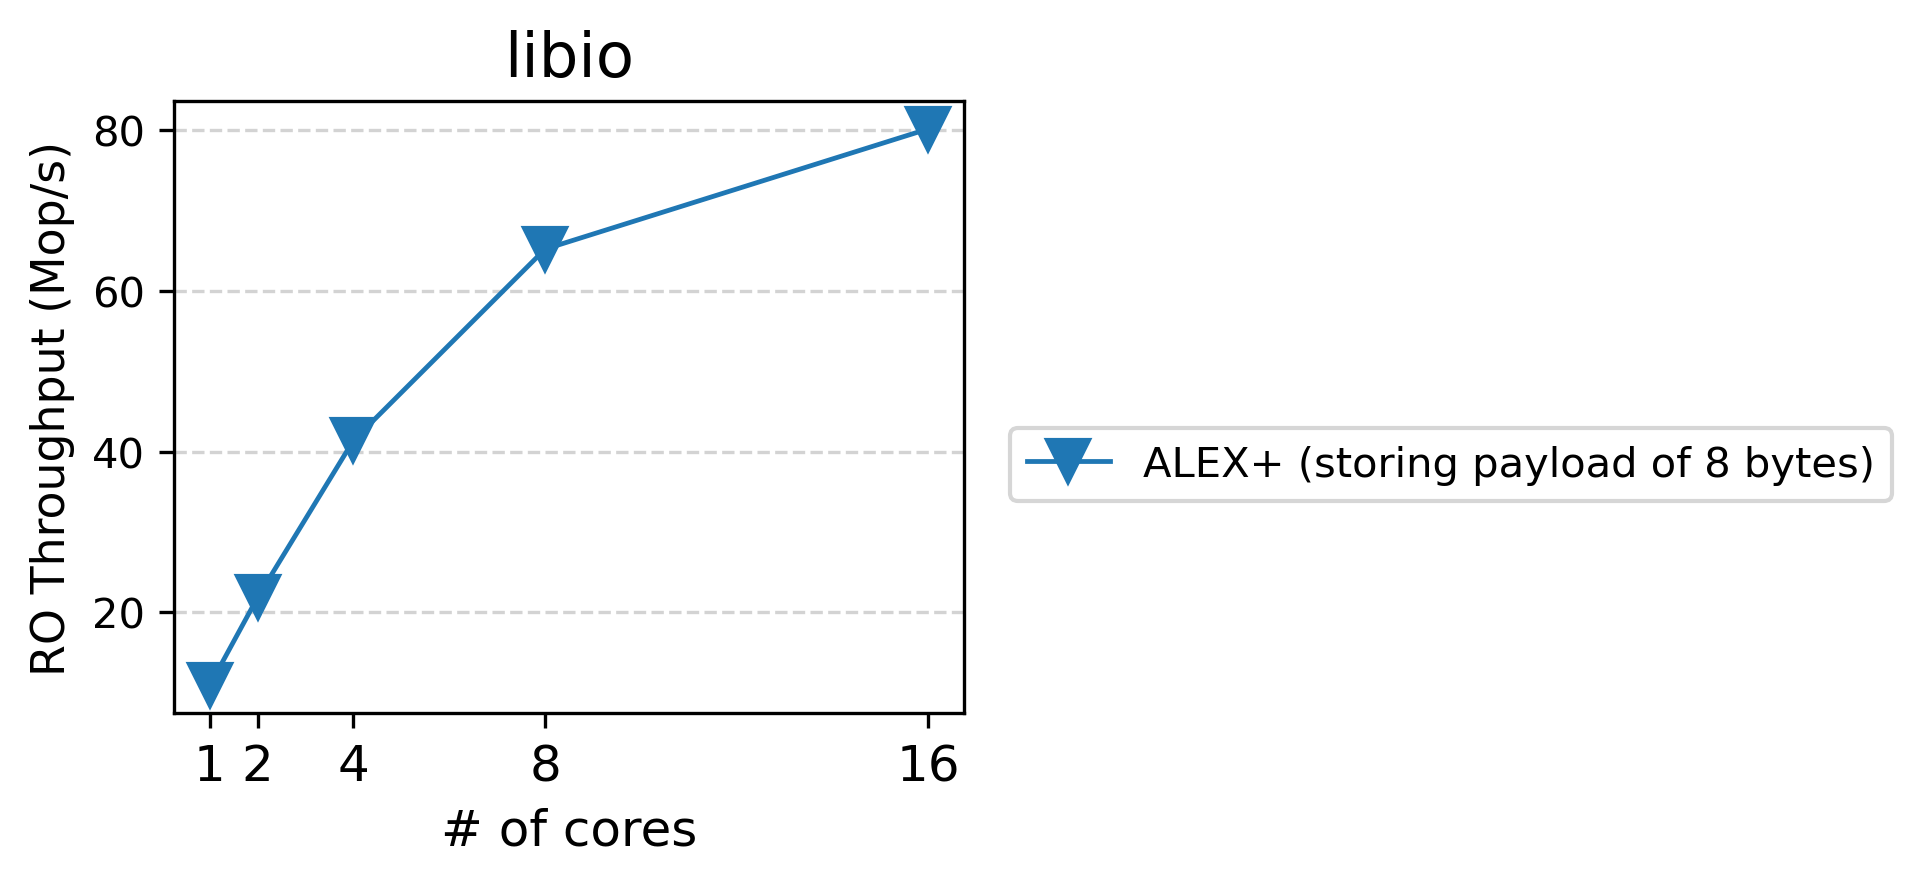

In [32]:
workload = 'RO'
indexes = ['alexol']

df1 = df1[df1['workload'] == workload]

df_mean1 = df1.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)

for i, system in enumerate(indexes):
    system_data = df1.loc[df1['index_type'] == system]
    system_mean = df_mean1.loc[df_mean1['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  \
             marker=systems.get(system).get('marker'), \
             color=systems.get(system).get('color'), \
             linestyle=systems.get(system).get('linestyle'), \
             markersize=10, linewidth=1.15) 
    
plt.xticks([1, 2, 4, 8, 16], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('libio', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.legend(labels=['ALEX+ (storing payload of 8 bytes)'], ncol=1, bbox_to_anchor=(2.2, 0.5))
plt.savefig('one.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
df2 = pd.read_csv('../out.csv').iloc[15:30][['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type', 'memory_consumption']]
df2['dataset'] = df2['key_path'].apply(lambda x: x.split('/')[-1])
df2['workload'] = df2['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df2['throughput'] = df2['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df2 = df2.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput', 'memory_consumption'
                                                      ]]
df2 = df2.sort_values(by=['workload', 'dataset', 'index_type', '# threads', 'memory_consumption'])
df2 = df2[df2['workload'] == 'RO'].reset_index(drop=True)
df2

,workload,dataset,index_type,# threads,throughput,memory_consumption
0,RO,libio,alexol,1,10.34,465834832
1,RO,libio,alexol,1,10.35,465834832
2,RO,libio,alexol,1,9.89,465834832
3,RO,libio,alexol,2,18.16,465834832
4,RO,libio,alexol,2,20.10,465834832
5,RO,libio,alexol,2,20.19,465834832
6,RO,libio,alexol,4,32.57,465834832
7,RO,libio,alexol,4,33.51,465834832
8,RO,libio,alexol,4,33.50,465834832
9,RO,libio,alexol,8,52.26,465834832


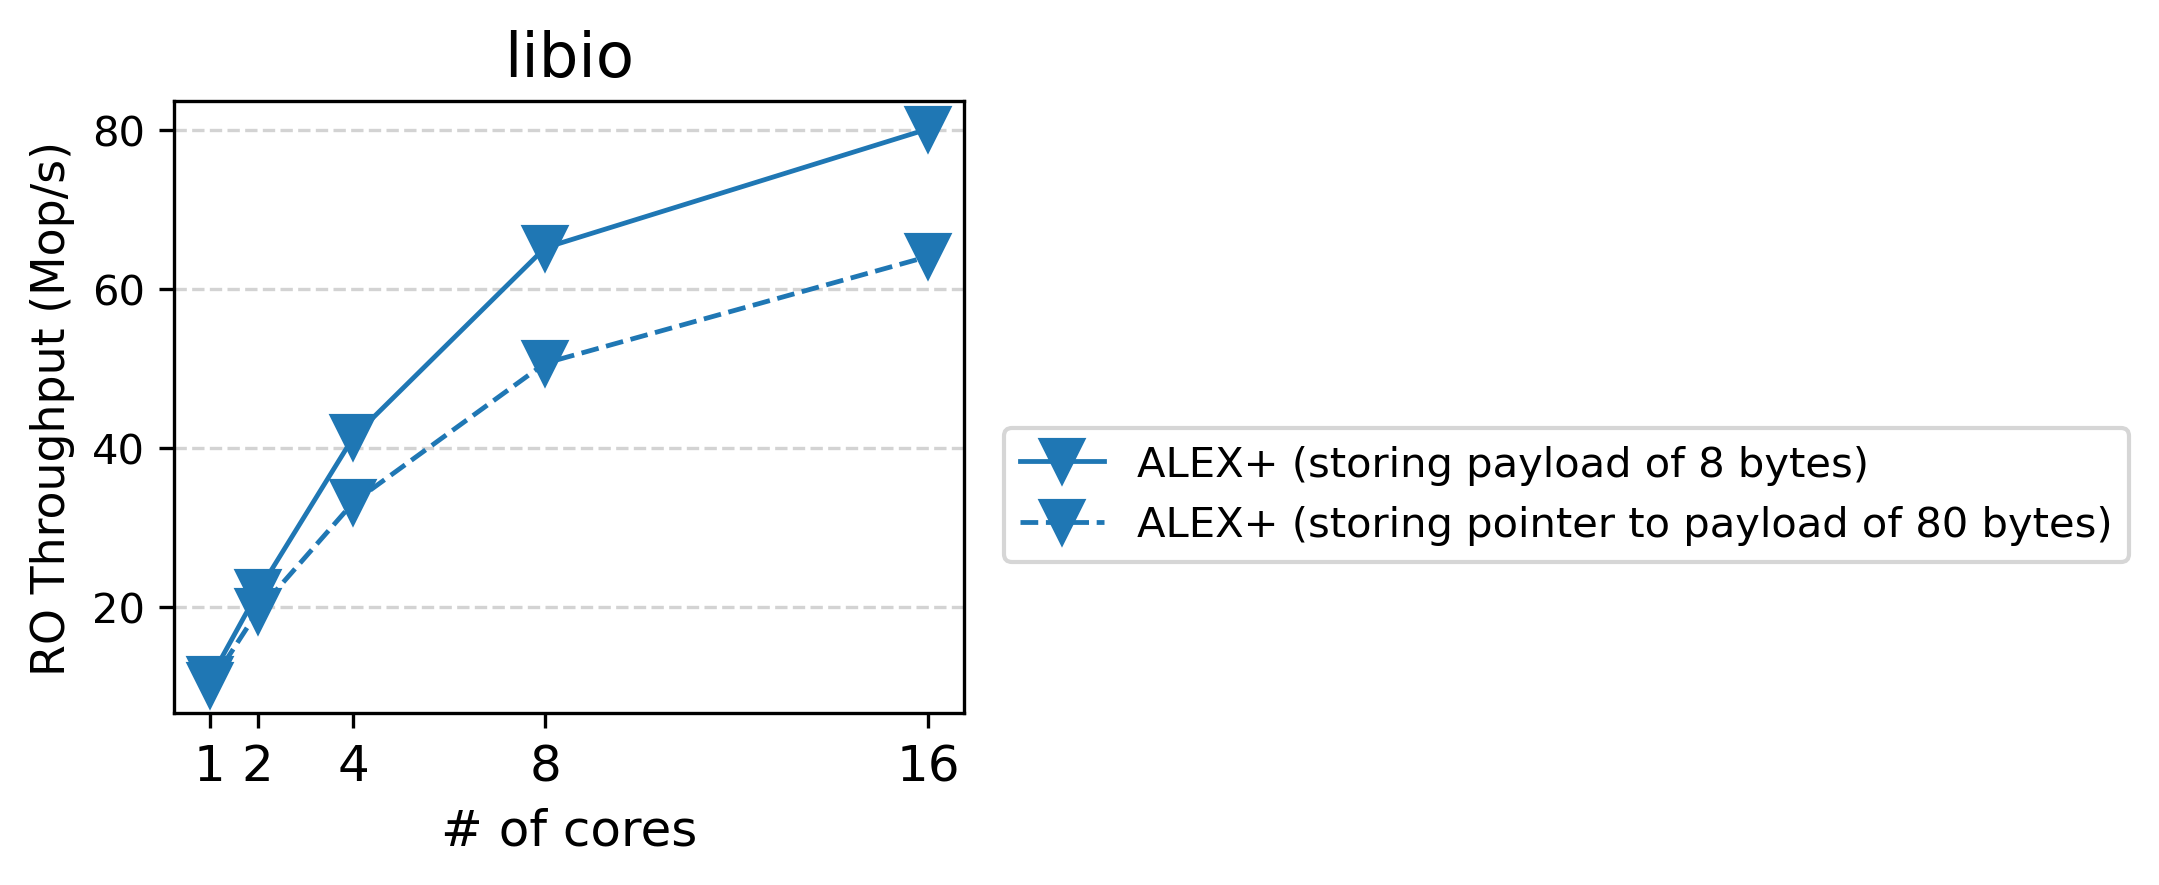

In [36]:
workload = 'RO'
indexes = ['alexol']

df1 = df1[df1['workload'] == workload]

df_mean1 = df1.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)


for i, system in enumerate(indexes):
    system_data = df1.loc[df1['index_type'] == system]
    system_mean = df_mean1.loc[df_mean1['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  
             marker=systems.get(system).get('marker'), 
             color=systems.get(system).get('color'), 
             linestyle=systems.get(system).get('linestyle'), 
             markersize=10, linewidth=1.15, label='df1')  # Add label='df1' for legend
    
workload = 'RO'  
df2 = df2[df2['workload'] == workload]

df_mean2 = df2.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

indexes_df2 = ['alexol']  # Assuming same index for df2 as well

for i, system in enumerate(indexes_df2):
    system_data = df2.loc[df2['index_type'] == system]
    system_mean = df_mean2.loc[df_mean2['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  
             marker=systems.get(system).get('marker'), 
             color=systems.get(system).get('color'), 
             linestyle='--', 
             markersize=10, linewidth=1.15, label='df2')  

plt.xticks([1, 2, 4, 8, 16], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('libio', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.legend(labels=['ALEX+ (storing payload of 8 bytes)', 'ALEX+ (storing pointer to payload of 80 bytes)'], ncol=1, bbox_to_anchor=(2.5, 0.5))
plt.savefig('two.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
df3 = pd.read_csv('../out.csv').iloc[30:45][['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type', 'memory_consumption']]
df3['dataset'] = df3['key_path'].apply(lambda x: x.split('/')[-1])
df3['workload'] = df3['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df3['throughput'] = df3['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df3 = df3.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput', 'memory_consumption'
                                                      ]]
df3 = df3.sort_values(by=['workload', 'dataset', 'index_type', '# threads', 'memory_consumption'])
df3 = df3[df3['workload'] == 'RO'].reset_index(drop=True)
df3

,workload,dataset,index_type,# threads,throughput,memory_consumption
0,RO,libio,alexol,1,6.44,1151336832
1,RO,libio,alexol,1,6.48,1151336832
2,RO,libio,alexol,1,6.48,1151336832
3,RO,libio,alexol,2,12.98,1151336832
4,RO,libio,alexol,2,12.97,1151336832
5,RO,libio,alexol,2,13.00,1151336832
6,RO,libio,alexol,4,24.76,1151336832
7,RO,libio,alexol,4,24.65,1151336832
8,RO,libio,alexol,4,24.70,1151336832
9,RO,libio,alexol,8,34.86,1151336832


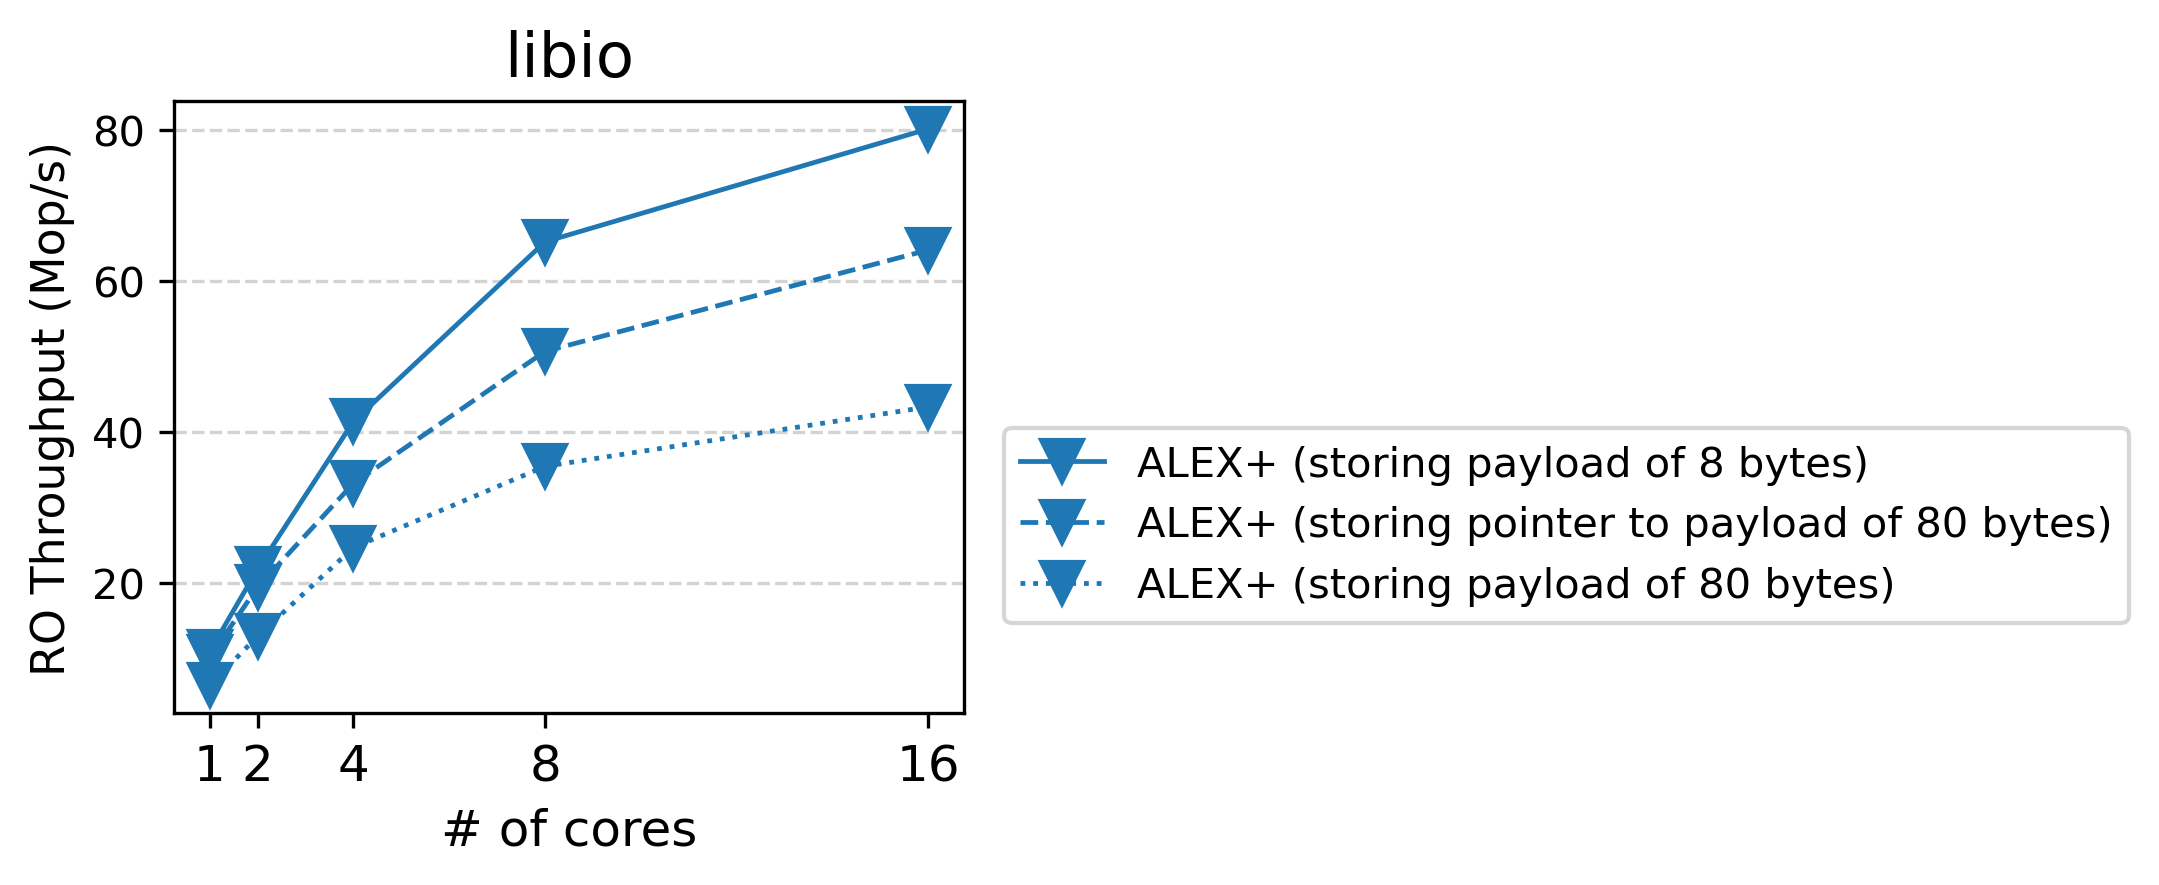

In [37]:
workload = 'RO'
indexes = ['alexol']

df1 = df1[df1['workload'] == workload]

df_mean1 = df1.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

fontsize = 10
plt.figure(figsize=(3.4, 2.65), dpi=300)


for i, system in enumerate(indexes):
    system_data = df1.loc[df1['index_type'] == system]
    system_mean = df_mean1.loc[df_mean1['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  
             marker=systems.get(system).get('marker'), 
             color=systems.get(system).get('color'), 
             linestyle=systems.get(system).get('linestyle'), 
             markersize=10, linewidth=1.15, label='df1')  # Add label='df1' for legend
    
workload = 'RO'  
df2 = df2[df2['workload'] == workload]

df_mean2 = df2.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

indexes_df2 = ['alexol']  # Assuming same index for df2 as well

for i, system in enumerate(indexes_df2):
    system_data = df2.loc[df2['index_type'] == system]
    system_mean = df_mean2.loc[df_mean2['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  
             marker=systems.get(system).get('marker'), 
             color=systems.get(system).get('color'), 
             linestyle='--', 
             markersize=10, linewidth=1.15, label='df2')  


workload = 'RO'  
df3 = df3[df3['workload'] == workload]

df_mean3 = df3.groupby(['index_type', '# threads'])['throughput'].mean().reset_index()

indexes_df3 = ['alexol']  # Assuming same index for df2 as well

for i, system in enumerate(indexes_df3):
    system_data = df3.loc[df2['index_type'] == system]
    system_mean = df_mean3.loc[df_mean3['index_type'] == system]
    plt.plot(system_mean['# threads'], system_mean['throughput'],  
             marker=systems.get(system).get('marker'), 
             color=systems.get(system).get('color'), 
             linestyle='dotted', 
             markersize=10, linewidth=1.15, label='df3')  


plt.xticks([1, 2, 4, 8, 16], fontsize=fontsize+2)

plt.xlabel('# of cores', fontsize=fontsize+2)
plt.ylabel(f'{workload} Throughput (Mop/s)', fontsize=fontsize+1)
plt.title('libio', fontsize=fontsize + 5)
plt.grid(axis='y', linestyle='--', color='lightgrey')
plt.legend(labels=['ALEX+ (storing payload of 8 bytes)', 'ALEX+ (storing pointer to payload of 80 bytes)', 'ALEX+ (storing payload of 80 bytes)'], ncol=1, bbox_to_anchor=(2.5, 0.5))

plt.savefig('three.jpeg', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
df4 = pd.read_csv('../out.csv').iloc[45:60][['read_ratio', 'key_path', 'throughput', 'thread_num', 'index_type', 'memory_consumption']]
df4['dataset'] = df4['key_path'].apply(lambda x: x.split('/')[-1])
df4['workload'] = df4['read_ratio'].apply(lambda x: 
        'RO' if x == 1.0 else 
        'BAL' if x == 0.5 else 
        'WO' if x == 0.0 else None)
df4['throughput'] = df4['throughput'].apply(lambda x: float(str(f'{x/10**6:.2f}')))
df4 = df4.rename(columns={'thread_num': '# threads'})[['workload', 'dataset', 'index_type', '# threads', 'throughput', 'memory_consumption'
                                                      ]]
df4 = df4.sort_values(by=['workload', 'dataset', 'index_type', '# threads', 'memory_consumption'])
df4 = df4[df4['workload'] == 'RO'].reset_index(drop=True)
df4

,workload,dataset,index_type,# threads,throughput,memory_consumption
0,RO,libio,alexol,1,13.27,465834832
1,RO,libio,alexol,1,13.29,465834832
2,RO,libio,alexol,1,13.28,465834832
3,RO,libio,alexol,2,26.55,465834832
4,RO,libio,alexol,2,26.57,465834832
5,RO,libio,alexol,2,26.56,465834832
6,RO,libio,alexol,4,50.51,465834832
7,RO,libio,alexol,4,50.57,465834832
8,RO,libio,alexol,4,50.52,465834832
9,RO,libio,alexol,8,85.33,465834832
